In [ ]:
# Company Overview
# Our company stands as the largest online loan marketplace, providing a comprehensive platform for personal loans, business loans, and financing for medical procedures. We offer borrowers easy access to lower interest rate loans through a streamlined and efficient online interface.

# Risk and Credit Loss
# Similar to other lending institutions, our greatest financial risk arises from lending to high-risk applicants, which leads to significant credit losses. Credit loss refers to the amount of money lost when a borrower defaults on their loan—essentially, when they refuse to repay or abscond with the owed amount. Borrower defaults represent the primary source of financial loss for lenders.

# Objective
# Our goal is to explore and identify the key factors contributing to loan defaults. By analyzing and understanding these driving variables, we aim to enhance our portfolio management and risk assessment processes. This knowledge will enable us to better predict defaults and mitigate associated risks.

In [84]:
#Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [85]:
#Settings to view the dataframes properly i.e. to view all the columns but limited number of rows
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', 150)

In [86]:
# Importing data from loan.csv file
loan_data = pd.read_csv("loan.csv", low_memory = False)
loan_data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [87]:
#Checking the dataset by seeing some of the starting rows
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [88]:
#Checking the dataset by seeing some of the rows below
loan_data.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,0.0,0.0,13,0,7274,13.10%,40,f,0.0,0.0,2822.969293,1213.88,2500.0,322.97,0.0,0.0,0.0,Jul-10,80.90,NaN,Jun-10,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,274xx,NC,6.40,1,Dec-86,1,5.0,0.0,6,0,8847,26.90%,9,f,0.0,0.0,9913.491822,1020.51,8500.0,1413.49,0.0,0.0,0.0,Jul-10,281.94,NaN,Jul-10,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.30,0,Oct-98,0,0.0,0.0,11,0,9698,19.40%,20,f,0.0,0.0,5272.161128,1397.12,5000.0,272.16,0.0,0.0,0.0,Apr-08,0.00,NaN,Jun-07,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,NaN,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,JAL Loan,208xx,MD,3.72,0,Nov-88,0,0.0,0.0,17,0,85607,0.70%,26,f,0.0,0.0,5174.198551,672.66,5000.0,174.20,0.0,0.0,0.0,Jan-08,0.00,NaN,Jun-07,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [89]:
#Checking the dataset, knowing the dtypes
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [90]:
loan_data.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint

In [91]:
#Getting basic insights about the dataset
loan_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [92]:
#Getting the number of rows & columns
loan_data.shape

(39717, 111)

In [93]:
#Checking column-wise null count here
loan_data.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12942
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [94]:
#Column wise null percentages
round(100*(loan_data.isnull().sum()/len(loan_data.index)), 2)

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.59
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

In [95]:
#Columns with more than 99.0% Null values
columnsWithNullPercentage = pd.DataFrame(round(100*(loan_data.isnull().sum()/len(loan_data.index)), 2),columns = ['null_percentage'])
columnsWithMoreThan99Null = columnsWithNullPercentage.loc[columnsWithNullPercentage.null_percentage > 99.0]
#Number of columns with more than 99.0% null values
print("Number of columns with more than 99.0% null values: "+str(len(columnsWithMoreThan99Null)))
columnsWithMoreThan99Null

Number of columns with more than 99.0% null values: 54


,null_percentage
mths_since_last_major_derog,100.0
annual_inc_joint,100.0
dti_joint,100.0
verification_status_joint,100.0
tot_coll_amt,100.0
tot_cur_bal,100.0
open_acc_6m,100.0
open_il_6m,100.0
open_il_12m,100.0
open_il_24m,100.0


In [96]:
#Columns with less than equal to 50% Null values
columnsWithLessThanEqualTo50PercentNulls = columnsWithNullPercentage.loc[columnsWithNullPercentage.null_percentage <= 50.0]
#Number of columns with more than 99.0% null values
print("Number of columns with less than equal to 50.0% null values: "+str(len(columnsWithLessThanEqualTo50PercentNulls)))
columnsWithLessThanEqualTo50PercentNulls

Number of columns with less than equal to 50.0% null values: 54


,null_percentage
id,0.00
member_id,0.00
loan_amnt,0.00
funded_amnt,0.00
funded_amnt_inv,0.00
term,0.00
int_rate,0.00
installment,0.00
grade,0.00
sub_grade,0.00


In [97]:
#Columns with greater than 50% less than 99% Null values
columnsWithGreaterThan50AndLessThan99PercentNulls = columnsWithNullPercentage.loc[(columnsWithNullPercentage.null_percentage > 50.0) & (columnsWithNullPercentage.null_percentage < 99.0)]
#Number of columns with more than 99.0% null values
print("Number of columns with less than equal to 50.0% null values: "+str(len(columnsWithGreaterThan50AndLessThan99PercentNulls)))
columnsWithGreaterThan50AndLessThan99PercentNulls

Number of columns with less than equal to 50.0% null values: 3


,null_percentage
mths_since_last_delinq,64.66
mths_since_last_record,92.99
next_pymnt_d,97.13


In [98]:
#Checking total columns to be 111
len(columnsWithMoreThan99Null) + len(columnsWithLessThanEqualTo50PercentNulls) + len(columnsWithGreaterThan50AndLessThan99PercentNulls) == len(loan_data.columns)

True

In [99]:
#Removing columns with 100% null values
loan_data.drop(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit'],inplace = True, axis=1)

In [100]:
#Let's check the dataframe now after removing the records with 100.0% null values
loan_data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,0.0,0.0,13,0,7274,13.10%,40,f,0.00,0.00,2822.969293,1213.88,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,NaN,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,274xx,NC,6.40,1,Dec-86,1,5.0,0.0,6,0,8847,26.90%,9,f,0.00,0.00,9913.491822,1020.51,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,NaN,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A

In [101]:
#The dataframe still has 3 columns with high null percentages as calculated above
# column 'mths_since_last_record' has 92.99% null values. As we cannot put some random values in 92.99% of the rows for this columm
# Thus we remove column 'mths_since_last_record' from the dataframe
# Similarly we remove the column 'next_pymnt_d' with 97.13% null values
# Also dropping column 'desc'
loan_data.drop(['mths_since_last_record','next_pymnt_d','desc'],inplace = True, axis = 1)

In [102]:
#Checking number and type of columns
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [103]:
#Checking categories of column 'term' i.e. only two must be there and no other
loan_data.groupby('term').sum()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
term,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
36 months,19066799356,23650987658,279116075,275513125,2.573186e+08,10.65%15.96%13.49%7.90%18.64%12.69%13.49%9.91%...,9069028.46,BCCAEBCBBDCABABBBBBCBBAAACBBABAADDABABAABBBCBB...,B2C5C1A4E1B5C1B1B2D1C4A1B3A1B4B3B3B3B1C2B3B3A3...,AIR RESOURCES BOARDVeolia TransportatonMKC Acc...,10+ years10+ years10+ years3 years9 years10+ y...,RENTRENTRENTRENTRENTOWNRENTRENTRENTRENTRENTMOR...,1.954377e+09,VerifiedNot VerifiedSource VerifiedSource Veri...,Dec-11Dec-11Dec-11Dec-11Dec-11Dec-11Dec-11Dec-...,Fully PaidFully PaidFully PaidFully PaidFully ...,nnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnn...,https://lendingclub.com/browse/loanDetail.acti...,credit_cardsmall_businessotherweddingcardebt_c...,Computerreal estate businesspersonelMy wedding...,860xx606xx917xx852xx900xx913xx245xx606xx951xx6...,AZILCAAZCACAVAILCAMOCACTUTCAFLTXCACAILNYFLMNNY...,377739.92,4208,Jan-85Nov-01Feb-96Nov-04Jan-07Oct-89Apr-04Jul-...,24515,367339.0,266503,1572,369170174,83.70%98.50%21%28.30%87.50%67.10%91.70%43.10%5...,623394,ffffffffffffffffffffffffffffffffffffffffffffff...,0.0,0.00,3.005698e+08,2.815733e+08,2.574183e+08,41569808.34,38260.421602,1.543473e+06,278038.9538,Jan-15Jun-14Jan-15Jan-15Jan-15Sep-13Jul-12Jan-...,59734698.88,May-16May-16Apr-16Jan-16Dec-14Aug-13Nov-12May-...,0.0,29096,INDIVIDUALINDIVIDUALINDIVIDUALINDIVIDUALINDIVI...,0,0.0,0,1186.0,0.0
60 months,8065150835,10126873531,166486575,159297200,1.556369e+08,15.27%12.69%15.96%21.28%12.69%14.65%15.27%16.7...,3821597.40,CBCFBCCDCBEEBDCBDFDFEDDBEFBDBDDFCEEBEEDCCCBFBC...,C4B5C5F2B5C3C4D2C5B5E4E4B5D3C3B2D3F2D4F3E4D3D3...,RyderUniversity Medical GroupSouthern Star Pho...,< 1 year1 year8 years4 years< 1 year5 years3 y...,RENTRENTRENTOWNRENTOWNRENTRENTRENTRENTRENTRENT...,7.848620e+08,Source VerifiedSource VerifiedNot VerifiedSour...,Dec-11Dec-11Dec-11Dec-11Dec-11Dec-11Dec-11Dec-...,Charged OffCurrentFully PaidCharged OffCharged...,nnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnn...,https://lendingclub.com/browse/loanDetail.acti...,carotherdebt_consolidationsmall_businessotherd...,bikePersonalLoanExpand Business & Buy Debt Por...,309xx972xx280xx958xx774xx853xx770xx150xx330xx6...,GAORNCCATXAZTXPAFLILWAMANJCAWIOHMNCAGACAFLNYWA...,151097.08,1611,Apr-99Jan-96Jul-05Apr-04Sep-04Jan-98Nov-97Oct-...,10007,136531.0,102643,615,162343694,9.40%53.90%85.60%32.60%36.50%20.60%85.60%59.50...,253908,ffffffffffffffffffffffffffffffffffffffffffffff...,2034618.0,2025160.62,1.821346e+08,1.778391e+08,1.315442e+08,48336101.87,15874.453590,2.238444e+06,214694.5923,Apr-13May-16May-16Apr-12Nov-12Jun-13Aug-15Dec-...,46660239.81,Sep-13May-16May-16Aug-12Mar-13Dec-15Mar-16May-...,0.0,10621,INDIVIDUALINDIVIDUALINDIVIDUALINDIVIDUALINDIVI...,0,0.0,0,502.0,0.0


In [104]:
#Converting column 'int_rate' to type float
loan_data['int_rate'] = loan_data['int_rate'].str.replace("%","").astype(float)

In [105]:
#Checking type of column 'int_rate' i.e. it must be 'float' after the converstion done in 'In[21]'
type(loan_data['int_rate'][0])

numpy.float64

In [106]:
#Converting column 'emp_length' to float type, Also taking '< 1' years experience as 0.5 years experienced
loan_data['emp_length'] = loan_data['emp_length'].str.replace('< 1','0.5').str.replace('+','').str.split(' ').str[0].astype(float)

In [107]:
#Checking type of column 'emp_length' i.e. it must be float after the conversion performed above
type(loan_data['emp_length'][0])

numpy.float64

In [108]:
# Converting column 'revol_util' to float type
loan_data['revol_util'] = loan_data['revol_util'].str.replace('%','').astype(float)

In [109]:
#Checking type of column 'emp_length' i.e. it must be float after the conversion performed above
type(loan_data['revol_util'][0])
# loan_data

numpy.float64

In [110]:
#Let's see the null values percent with null percentage greater than 0.00
def getColumnsWithNonZeroNullPercentages(df):
    nullPercentageInColumns = pd.DataFrame(round(loan_data.isnull().sum()/len(loan_data)*100,2), columns = ['nullPercentage'])
    return nullPercentageInColumns.loc[nullPercentageInColumns.nullPercentage > 0.00].sort_values(by = 'nullPercentage', ascending = False)

In [111]:
#emp_title  has 6.19% null values but this must not affect so let it be
#emp_length has 2.71% null values, let's remove these
loan_data = loan_data.loc[~pd.isnull(loan_data.emp_length)]
getColumnsWithNonZeroNullPercentages(loan_data)

,nullPercentage
mths_since_last_delinq,64.57
emp_title,3.73
pub_rec_bankruptcies,1.80
last_pymnt_d,0.17
collections_12_mths_ex_med,0.14
chargeoff_within_12_mths,0.14
revol_util,0.12
tax_liens,0.10
title,0.03
last_credit_pull_d,0.01


In [112]:
#Dropping column 'mths_since_last_delinq' as it contains huge number of null values
loan_data.drop(['mths_since_last_delinq'], inplace = True, axis = 1)
getColumnsWithNonZeroNullPercentages(loan_data)

/tmp/ipykernel_54576/1296725421.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data.drop(['mths_since_last_delinq'], inplace = True, axis = 1)


,nullPercentage
emp_title,3.73
pub_rec_bankruptcies,1.80
last_pymnt_d,0.17
collections_12_mths_ex_med,0.14
chargeoff_within_12_mths,0.14
revol_util,0.12
tax_liens,0.10
title,0.03
last_credit_pull_d,0.01


In [113]:
#Removing null values from column 'emp_title'
loan_data = loan_data.loc[~pd.isnull(loan_data.emp_title)]
getColumnsWithNonZeroNullPercentages(loan_data)

,nullPercentage
pub_rec_bankruptcies,1.76
last_pymnt_d,0.17
collections_12_mths_ex_med,0.13
chargeoff_within_12_mths,0.13
revol_util,0.12
tax_liens,0.09
title,0.02


In [114]:
#Removing null values from column 'revol_util'
loan_data = loan_data.loc[~pd.isnull(loan_data.revol_util)]
getColumnsWithNonZeroNullPercentages(loan_data)

,nullPercentage
pub_rec_bankruptcies,1.76
last_pymnt_d,0.16
collections_12_mths_ex_med,0.13
chargeoff_within_12_mths,0.13
tax_liens,0.09
title,0.02


In [115]:
# Checking id column should be unique and we see that it contains unique values
loan_data[loan_data.duplicated(['id'], keep = False)]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens


In [116]:
# Checking member_id column should be unique and we see that it contains unique values
loan_data[loan_data.duplicated(['member_id'], keep = False)]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens


In [184]:
# code for dropping duplicate values here
loan_data.drop_duplicates(inplace=True)

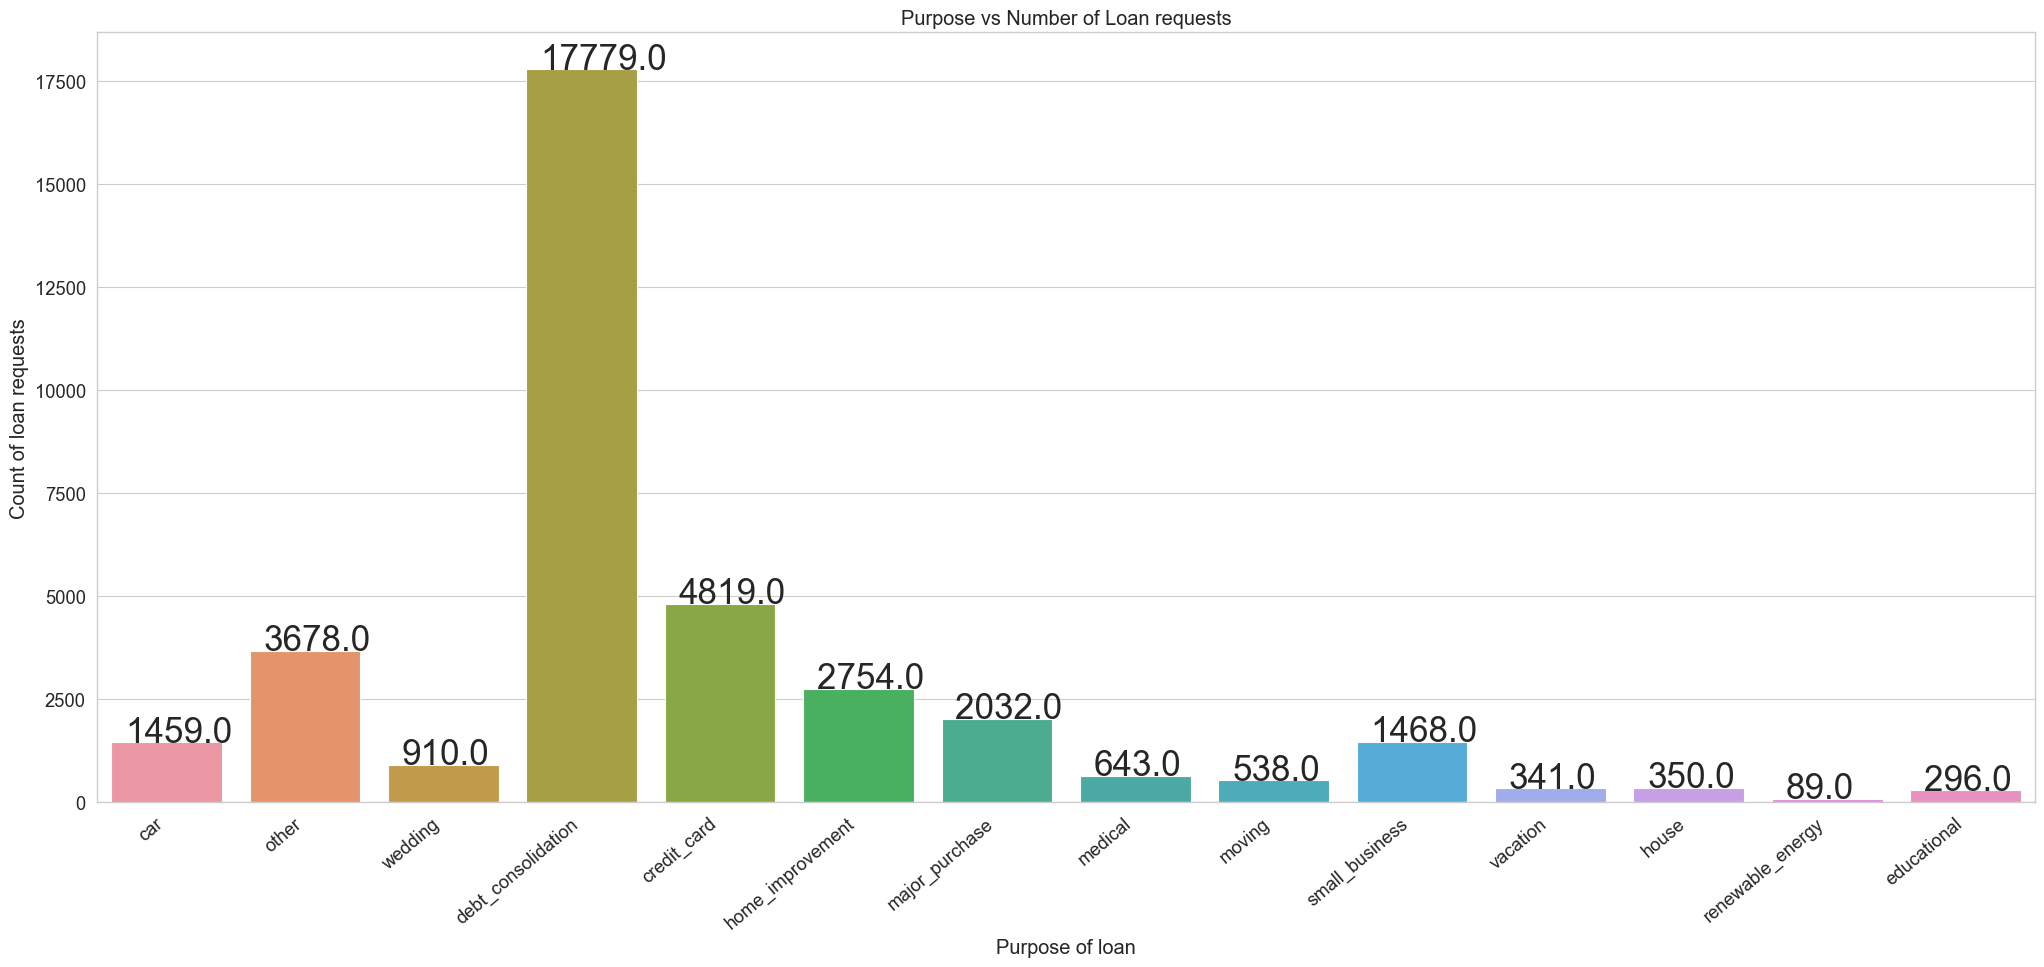

In [118]:
#Plotting the count of the total requests received for each value of column 'purpose'
# We need to run this 2-3 times in order to set Font_scale
plt.figure(figsize=(25,10))
plt.title('Purpose vs Number of Loan requests')
ax = sns.countplot(x='purpose', data = loan_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
sns.set_context("talk", font_scale=1.4)
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+10))
ax.set(xlabel="Purpose of loan", ylabel = "Count of loan requests")    
plt.show()

### The highest number of requests are received for the purpose of 'debt_consolidation' as seen above

In [119]:
# Separting out the dataframe with loan_stats as 'charged_off'
charged_off_loans = loan_data.loc[loan_data.loan_status == 'Charged Off']
charged_off_loans

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,0.5,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,f,0.0,0.0,1008.71,1008.71,456.46,435.17,0.00,117.08,1.1100,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
9,1071570,1306721,5375,5375,5350.0,60 months,12.69,121.45,B,B5,Starbucks,0.5,RENT,15000.0,Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,other,Building my credit history.,774xx,TX,18.08,0,Sep-04,0,2,0,9279,36.5,3,f,0.0,0.0,1476.19,1469.34,673.48,533.42,0.00,269.29,2.5200,Nov-12,121.45,Mar-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
12,1064687,1298717,9000,9000,9000.0,36 months,13.49,305.38,C,C1,Va. Dept of Conservation/Recreation,0.5,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,freedom,245xx,VA,10.08,0,Apr-04,1,4,0,10452,91.7,9,f,0.0,0.0,2270.70,2270.70,1256.14,570.26,0.00,444.30,4.1600,Jul-12,305.38,Nov-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
14,1069057,1303503,10000,10000,10000.0,36 months,10.65,325.74,B,B2,SFMTA,3.0,RENT,100000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,other,Other Loan,951xx,CA,7.06,0,May-91,2,14,0,11997,55.5,29,f,0.0,0.0,7471.99,7471.99,5433.47,1393.42,0.00,645.10,6.3145,Oct-13,325.74,Mar-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
21,1039153,1269083,21000,21000,21000.0,36 months,12.42,701.73,B,B4,Osram Sylvania,10.0,RENT,105000.0,Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt Cleanup,335xx,FL,13.22,0,Feb-83,0,7,0,32135,90.3,38,f,0.0,0.0,14025.40,14025.40,10694.96,3330.44,0.00,0.00,0.0000,Sep-13,701.73,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39667,118823,118026,2500,2500,675.0,36 months,12.80,84.00,D,D4,Nebraska Occupational Therapy,0.5,MORTGAGE,32000.0,Not Verified,Aug-07,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,Need to put in new countertops.,685xx,NE,20.00,0,Jul-92,1,11,0,3408,35.1,32,f,0.0,0.0,2220.61,599.28,1706.01,477.21,1.69,35.70,0.3800,Mar-10,1.76,May-16,NaN,1,INDIVIDUAL,0,NaN,0,NaN,0.0
39668,118533,117783,2500,2500,825.0,36 months,9.64,80.26,B,B4,AMZ Marketing,0.5,MORTGAGE,75000.0,Not Verified,Aug-07,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,re-model bathroom,685xx,NE,20.00,0,Feb-94,3,9,0,269,3.8,35,f,0.0,0.0,2086.63,688.35,1730.83,354.44,1.36,0.00,0.0000,Mar-10,1.40,May-16,NaN,1,INDIVIDUAL,0,NaN,0,NaN,0.0
39669,118523,118519,6500,6500,225.0,36 months,15.01,225.37,F,F1,Universal Advertising,9.0,MORTGAGE,213000.0,Not Verified,Aug-07,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,Business Financing Aug 2007,300xx,GA,6.45,0,Jul-90,0,11,0,56411,75.3,28,f,0.0,0.0,4054.35,139.42,2886.21,1168.14,0.00,0.00,0.0000,Feb-09,225.37,May-16,NaN,1,INDIVIDUAL,0,NaN,0,NaN,0.0
39678,113179,113093,1000,1000,950.0,36 months,10.59,32.55,C,C2,Invision Power Services,2.0,MORTGAGE,33990.0,Not Verified,Aug-07,Charged Off,n,https:/

### From the above plot we see that loan requesters who have 'rent' as the home ownership are the most likely to default. Moreover, we can rely on the persons who OWN the house rathern than who have 'RENT' or 'MORTGAGE' as their 'home_ownership' status

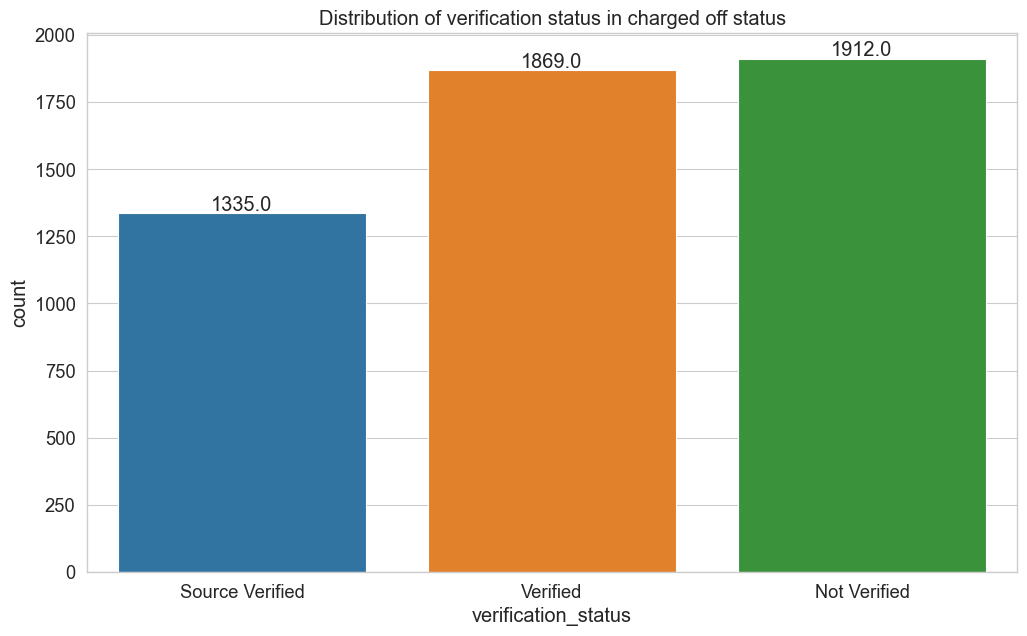

In [121]:
plt.figure(figsize=(12,7))
sns.set_context("paper", font_scale=1.5)
ax = sns.countplot(x="verification_status", data = charged_off_loans)
plt.title('Distribution of verification status in charged off status')
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+10))
plt.show()

### Not verified and Verified verification status shows higher count of charged off loans than the source verified ones. Thus, the banks should do the source verification to minimise the credit loss.

### From the above plot we see that the purpose 'debt_consolidation' has the highest count of charged off loans. So, one should minimise the loan sanctions for this purpose. 
### Moreover, the second highest charged off loans are for the purpose  'other' which means that the banks should define some more categories or ask the person if he/she is taking the loan mentioning purpose as 'others' to minimise the risk.

### From the above plot, its evident that the charged off loans are highest in grade 'B' and this number decrease as we move on to higher grades i.e. C to G

### From the above plot, loans with sub_grade as 'B5', 'D2' are most likely to default. The number of charged off loans tend to decrease as we move from 'E1' to 'G5'

### From the above plot, we see that the states where the loans have been charged off are mostly from CA, NY, FL, TX, NJ, GA

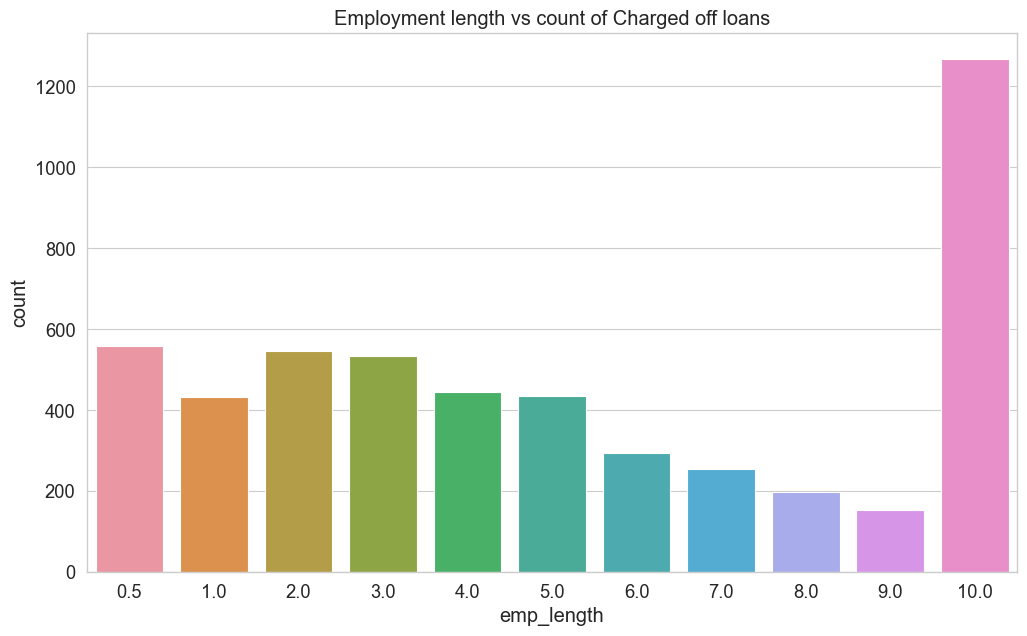

In [126]:
plt.figure(figsize=(12,7))
sns.set_context("paper", font_scale=1.5)
ax = sns.countplot(x="emp_length", data=charged_off_loans)
plt.title('Employment length vs count of Charged off loans')
plt.show()

### Interestingly 10+ i.e. (10 here) years experienced members have 2 times more charged off records than freshers, however members with 4-9 years of job experience showed relatively 2-6 times less charged off record when compared to 10+years experienced. So, the 10+ experiences are most likely to default as per the above plot.

In [127]:
def getDerivedPercentageOnColumnBasedOnLoanStatus(colName):
    return round(100*(loan_data.groupby([loan_data[colName],loan_data['loan_status']]).size()/loan_data.groupby([loan_data[colName]])['loan_status'].count()),2).to_frame('percentage').reset_index()

In [128]:
# Deriving percetage column on the basis of loan_status for column term
term_loan_status_percentage_df = getDerivedPercentageOnColumnBasedOnLoanStatus('term')
term_loan_status_percentage_df

,term,loan_status,percentage
0,36 months,Charged Off,10.66
1,36 months,Fully Paid,89.34
2,60 months,Charged Off,22.13
3,60 months,Current,10.58
4,60 months,Fully Paid,67.29


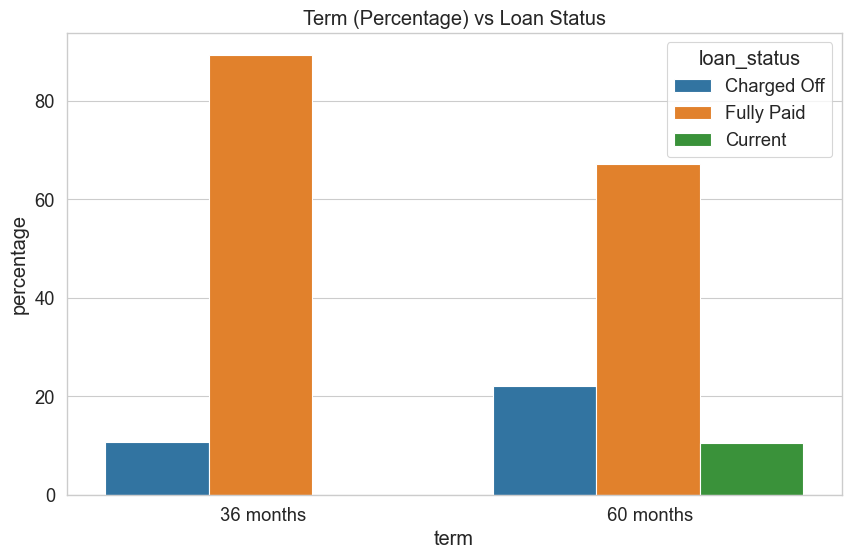

In [129]:
# plot of Term(Percentage) vs Loan status
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
sns.set_context("paper", font_scale=1.5)
ax = sns.barplot(x="term", y="percentage", hue="loan_status", data=term_loan_status_percentage_df)
plt.title('Term (Percentage) vs Loan Status')
plt.show()

### From the above graph it is evident that borrowers with 60 months term  are likely to default as compared to 36 months, whereas fully paid members are high in 36 months.


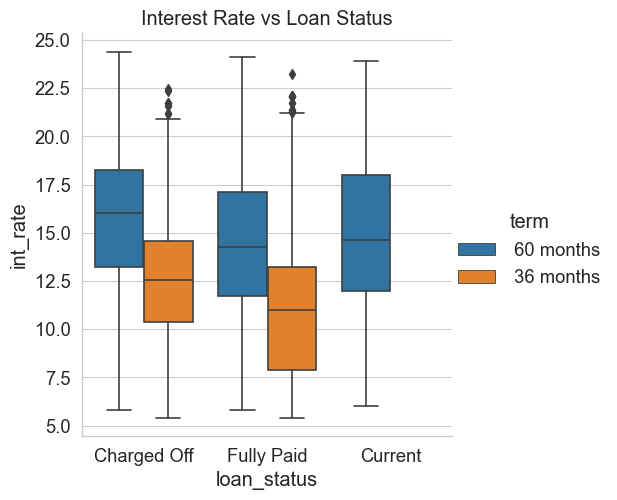

In [130]:
# Interest rate vs Loan status
sns.catplot(x="loan_status", y="int_rate", hue="term", kind="box", data=loan_data)
plt.title('Interest Rate vs Loan Status')
plt.show()

### As seen from the above plot, we see that we have more fully paid loans for lower interest rates and lower term (period)
### Also, the borrower is more likely to default with higher interest rates and higher term

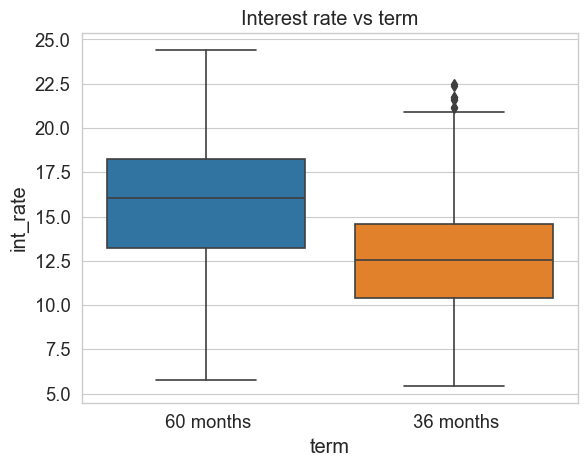

In [131]:
# Interest rate vs Term
ax = sns.boxplot(x="term", y="int_rate", data=charged_off_loans)
plt.title('Interest rate vs term')
plt.show()

### From the above box plot we can know that interest rate is high for 60 months term than compared to 36 months. Hence we can extrapolate that due to high interest rate there is increased % of charged off status in 60 months term.

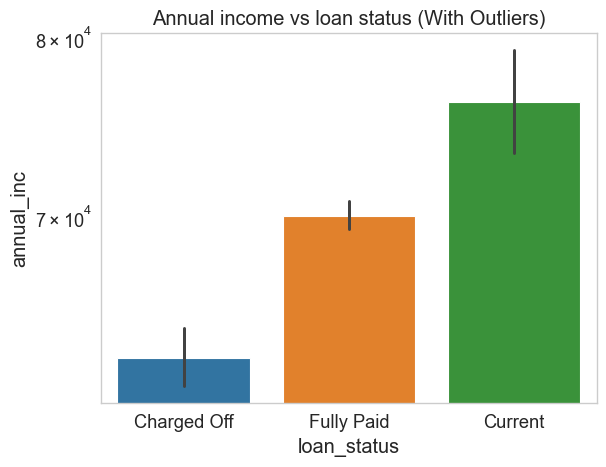

In [132]:
# barplot without removing outliers for annual_inc vs loan_status
ax = sns.barplot(x="loan_status", y="annual_inc", data=loan_data)
ax.set_yscale('log')
plt.title('Annual income vs loan status (With Outliers)')
plt.show()

In [133]:
# calculating 5 and 95th percentiles from annual_inc
higherPercentileValue = loan_data["annual_inc"].quantile(0.95)
lowerPercentilValue = loan_data["annual_inc"].quantile(0.05)

In [134]:
# removing outliers using 5 and 95th percentiles from annual_inc
loan_ann_inc_new = loan_data[(loan_data["annual_inc"]<=higherPercentileValue)&(loan_data["annual_inc"]>=lowerPercentilValue)].head()
loan_ann_inc_new.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,0.5,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10.0,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,f,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1.0,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.9,38,f,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


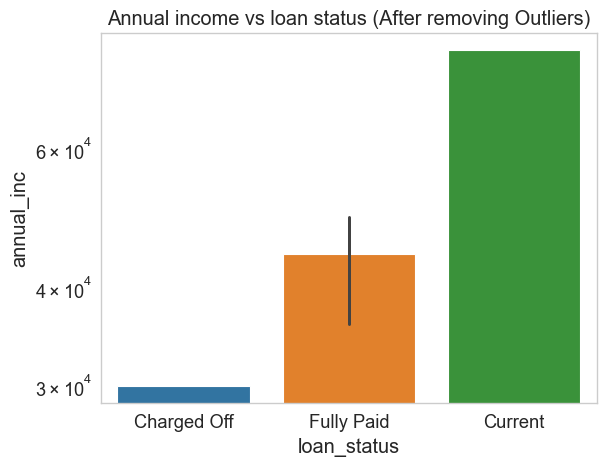

In [135]:
# Plot of annual_income vs loan_status after removing outliers
ax = sns.barplot(x="loan_status", y="annual_inc", data=loan_ann_inc_new)
ax.set_yscale('log')
plt.title('Annual income vs loan status (After removing Outliers)')
plt.show()

### From the above graph, it is evident that mean annual income of borrowers who are charged off from the loans is less when compared to fully paid or current status ones

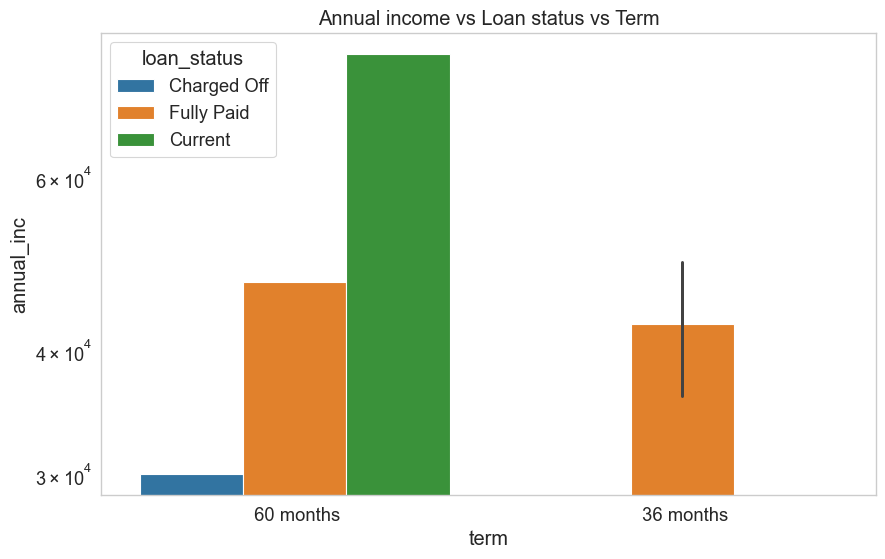

In [136]:
#Plot of annual income vs term vs loan_status
plt.figure(figsize=(10,6))
sns.set_context("paper", font_scale=1.5)
ax = sns.barplot(x="term", y="annual_inc", hue="loan_status",data=loan_ann_inc_new)
ax.set_yscale('log')
plt.title('Annual income vs Loan status vs Term')
plt.show()

### From above graph we can say that lower income group with 60 months term defaulted from paying the loans whereas 36 months term group with medium income paid their loans fully

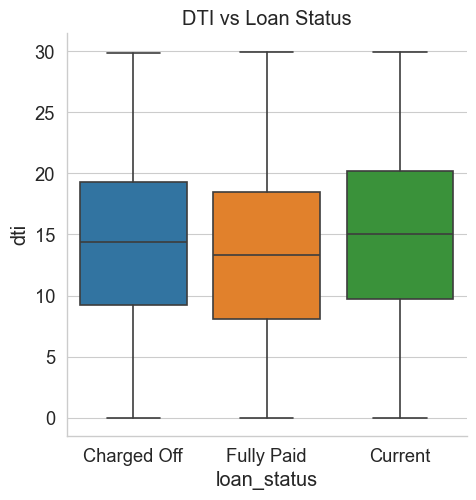

In [137]:
#Plot of Loan_status vs DTI
sns.catplot(x="loan_status", y="dti", kind="box", data=loan_data)
plt.title('DTI vs Loan Status')
plt.show()

### From the above plot we see that more the DTI, higher is the risk of a person defaulting

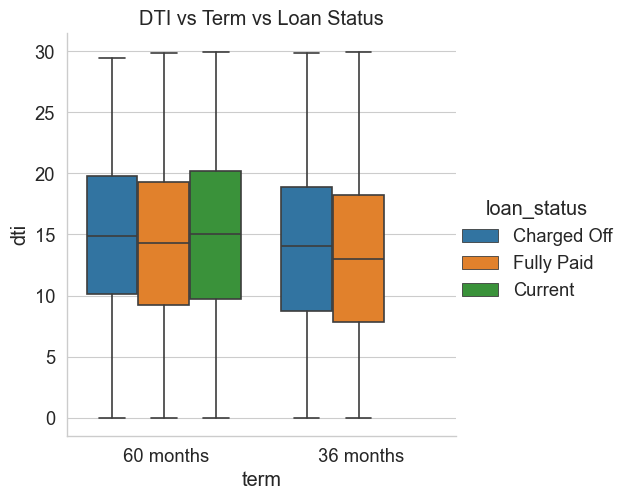

In [138]:
# Plot of DTI vs Term vs Loan_status
sns.catplot(x="term", y="dti", kind="box", hue="loan_status", data=loan_data)
plt.title('DTI vs Term vs Loan Status')
plt.show()

### From the above plot we can see that DTI is slightly higher for those who have been Charged off from the loan with 60 term period as compared to the 36 months period being charged off

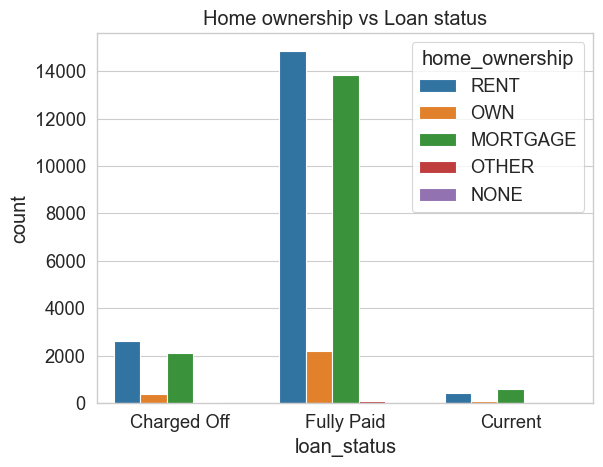

In [139]:
# Plot of loan_status vs home_ownership
ax = sns.countplot(x="loan_status", hue="home_ownership", data=loan_data)
plt.title('Home ownership vs Loan status')
plt.show()

### We cannot see any specific trend so we'll plot the Plot by deriving percentage within the home_ownership as done below

In [140]:
# Creating the new dataframe containing percentage w.r.t loan_status for every type of home ownership
home_ownership_percentage_loan_status = getDerivedPercentageOnColumnBasedOnLoanStatus('home_ownership')

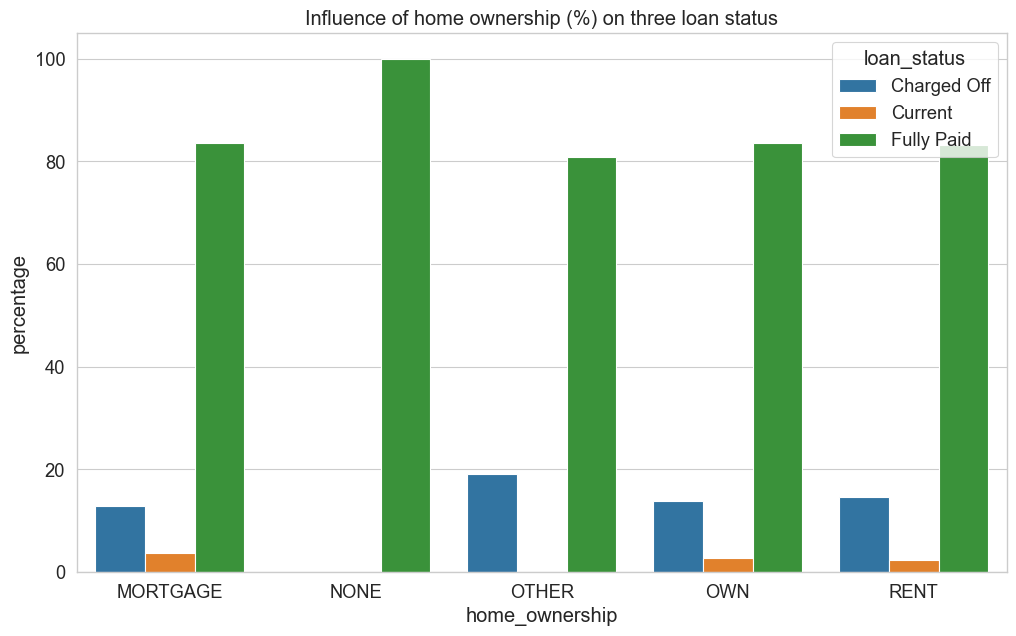

In [141]:
# Plot of home_ownership vs loan_status
plt.figure(figsize=(12,7))
ax = sns.barplot(x = "home_ownership", y = "percentage", hue = "loan_status",data = home_ownership_percentage_loan_status)
plt.title('Influence of home ownership (%) on three loan status')
plt.show()

### Borrowers with home_ownership as 'Other' are the most likely ones to default as seen from the above graph. We see that home_ownership => Other category  showed a little high percentage of charged off loans

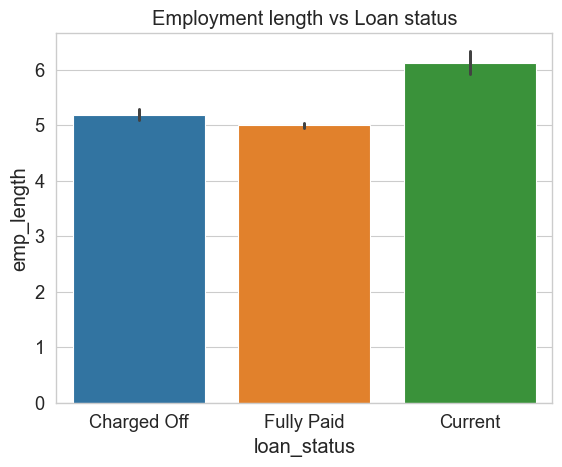

In [142]:
#Plot of emp_length vs loan_status
sns.barplot(x="loan_status", y="emp_length", data=loan_data)
plt.title('Employment length vs Loan status')
plt.show()

### Not giving any useful information

In [143]:
# Creating the new dataframe containing percentage w.r.t loan_status for every type of delinq_2years
delinq2yr_percentage_loan_status = getDerivedPercentageOnColumnBasedOnLoanStatus('delinq_2yrs')

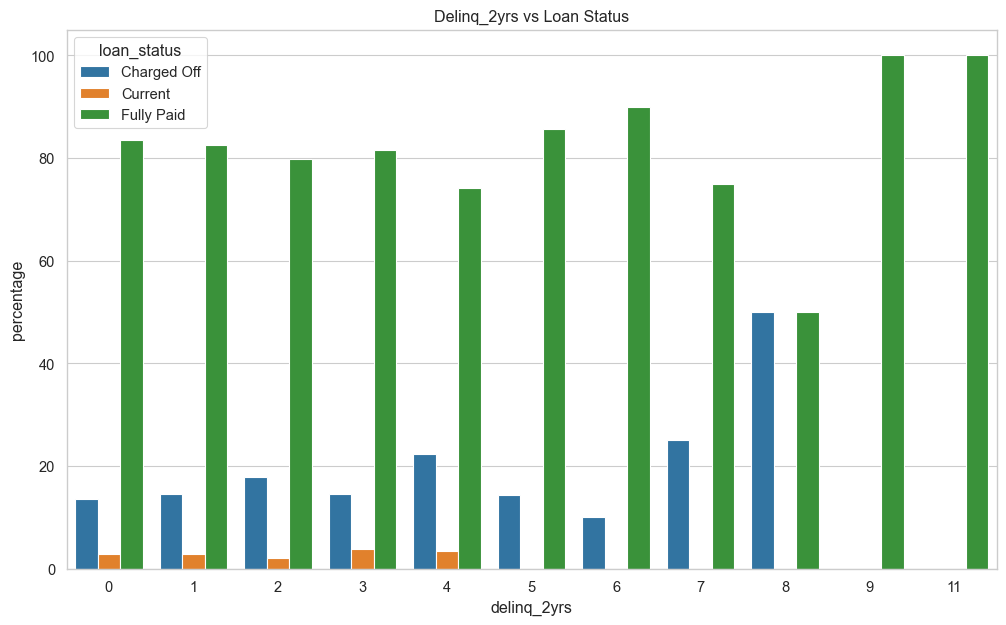

In [144]:
# Plot of delinq_2yrs vs Loan Status
plt.figure(figsize=(12,7))
sns.set_context("paper", font_scale=1.2)
ax = sns.barplot(x = "delinq_2yrs", y = "percentage", hue = "loan_status",data=delinq2yr_percentage_loan_status)
plt.title('Delinq_2yrs vs Loan Status')
plt.show()

### From above graph it is clear that as the incidences of delinquency in the borrower's credit file for the past 2 years increases there is no particular trend being followed. Thus we cannot conclude much from this attribute.

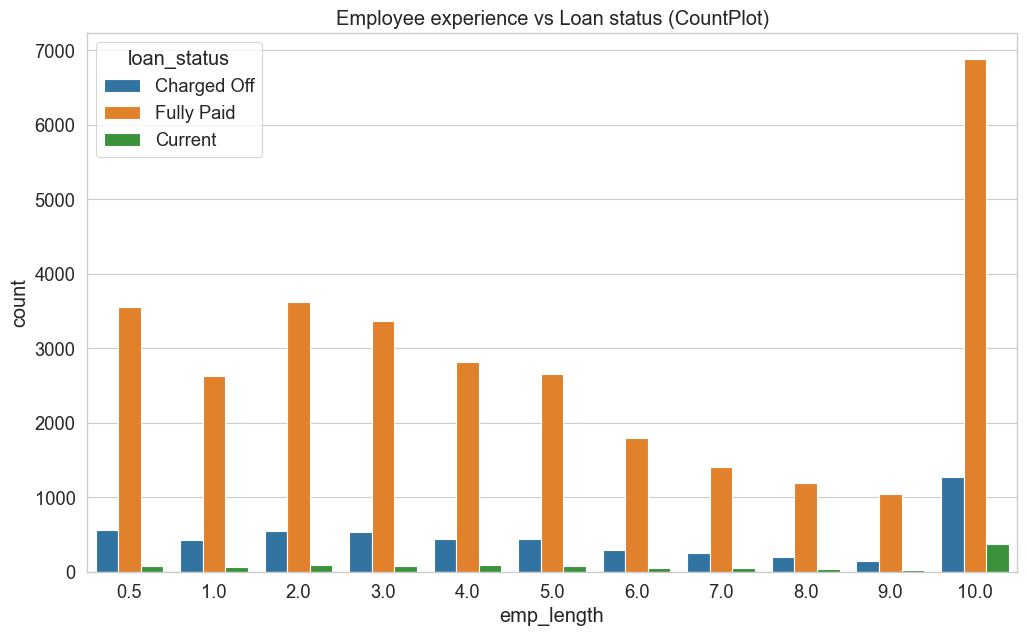

In [145]:
# Plot of employee experience vs loan_status
plt.figure(figsize=(12,7))
sns.set_context("paper", font_scale=1.5)
ax = sns.countplot(x="emp_length", hue="loan_status", data=loan_data)
plt.title('Employee experience vs Loan status (CountPlot)')
plt.show()

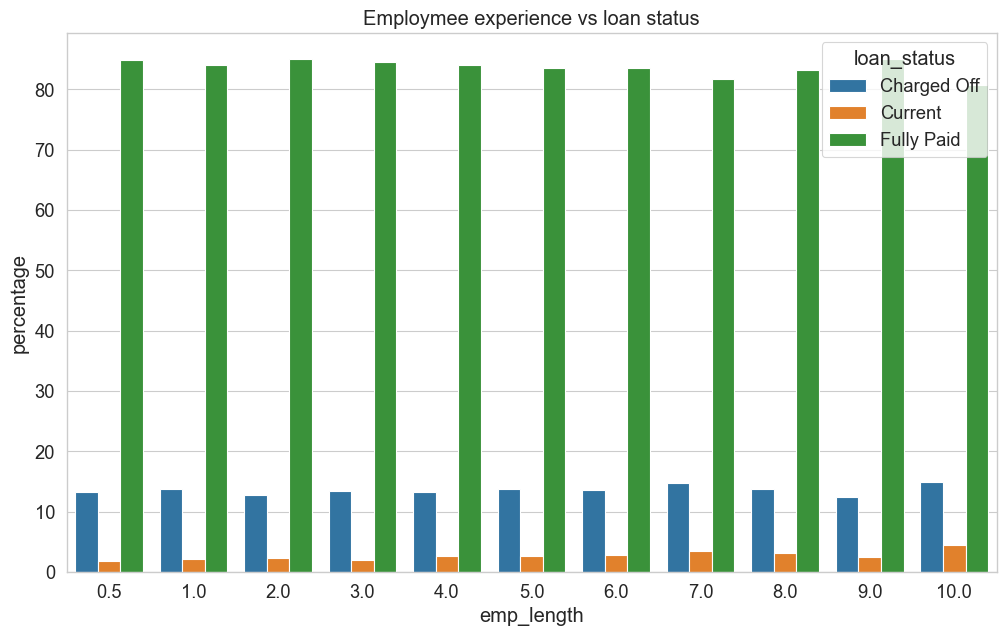

In [146]:
# Plot of employee experience(percentage w.r.t loan_status) vs loan status
loan_emplen_gb = getDerivedPercentageOnColumnBasedOnLoanStatus('emp_length')
plt.figure(figsize=(12,7))
ax = sns.barplot(x="emp_length", y="percentage", hue="loan_status",data=loan_emplen_gb)
plt.title('Employmee experience vs loan status')
plt.show()

### As seen in the above graph, we cannot see any upward or downward trend. So, employee length is not of much use in finding out the defaulters.

In [147]:
# Categorizing employee experience into categories like fresher, some_exp, etc.
loan_data['experience_category']= pd.cut(
        loan_data['emp_length'],
        [0,0.5,3,7,10],
        labels=['fresher','some_exp','med_exp','high_exp'])

In [148]:
# Creating the new dataframe containing percentage w.r.t loan_status for every type of emp_status
experience_category_percentage_loan_status = getDerivedPercentageOnColumnBasedOnLoanStatus('experience_category')
experience_category_percentage_loan_status

/tmp/ipykernel_54576/2088845708.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return round(100*(loan_data.groupby([loan_data[colName],loan_data['loan_status']]).size()/loan_data.groupby([loan_data[colName]])['loan_status'].count()),2).to_frame('percentage').reset_index()
/tmp/ipykernel_54576/2088845708.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return round(100*(loan_data.groupby([loan_data[colName],loan_data['loan_status']]).size()/loan_data.groupby([loan_data[colName]])['loan_status'].count()),2).to_frame('percentage').reset_index()


,experience_category,loan_status,percentage
0,fresher,Charged Off,13.32
1,fresher,Current,1.77
2,fresher,Fully Paid,84.92
3,some_exp,Charged Off,13.29
4,some_exp,Current,2.14
5,some_exp,Fully Paid,84.57
6,med_exp,Charged Off,13.73
7,med_exp,Current,2.84
8,med_exp,Fully Paid,83.43
9,high_exp,Charged Off,14.45


/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


Text(0.5, 1.0, 'Employment status in three loan status')

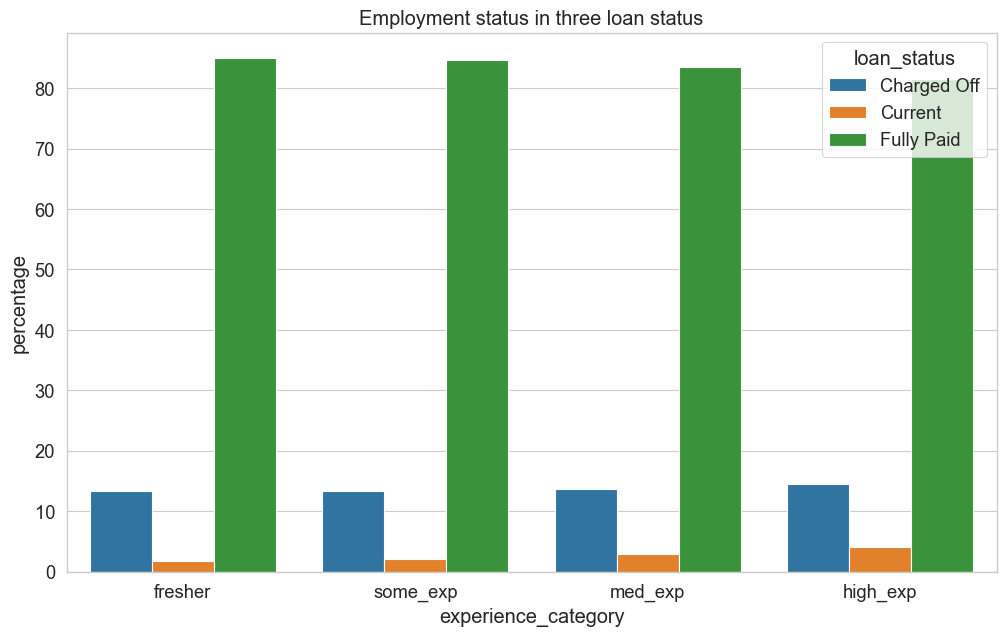

In [149]:
#Plot of employee status
plt.figure(figsize=(12,7))
ax = sns.barplot(x="experience_category", y="percentage", hue="loan_status",data=experience_category_percentage_loan_status)
plt.title('Employment status in three loan status')

### As seen from the above plot, we cannot see any trend i.e. upward or downward. Thus, it looks like it does not have influence on loan status and therefore not a deciding factor.

In [150]:
# Creating the new dataframe containing percentage w.r.t loan_status for every type of Verification status
purpose_percentage_loan_status = getDerivedPercentageOnColumnBasedOnLoanStatus('verification_status')

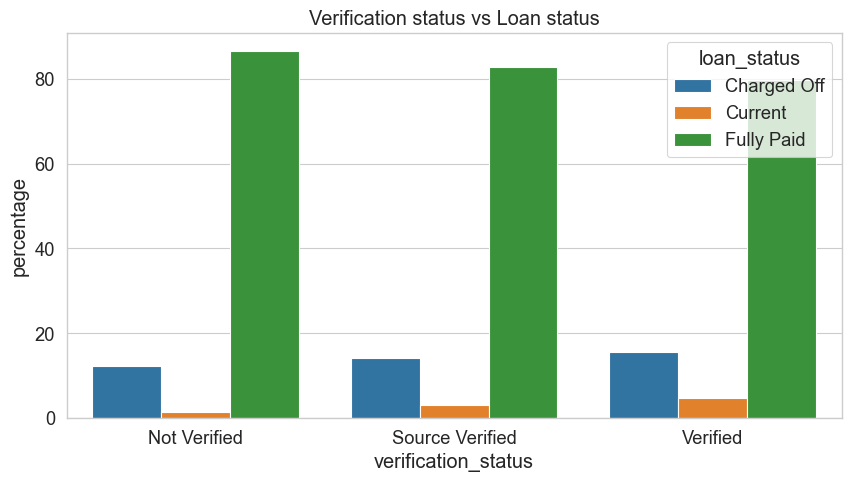

In [151]:
#Plot of Verification status vs loan status
plt.figure(figsize=(10,5))
ax = sns.barplot(x="verification_status", y="percentage", hue='loan_status', data=purpose_percentage_loan_status)
plt.title('Verification status vs Loan status')
plt.show()

### Verification status does not give much info about which borrower would default. As seen from the above graph, we have almost same percentages of defaulters among different Verification Statuses
### It seems to be the case that the verification might not have been done correctly. Thus, the maximum defaulters under the verified category.

In [152]:
# Creating the new dataframe containing purpose w.r.t loan_status for every type of Verification status
purpose_percentage_loan_status = getDerivedPercentageOnColumnBasedOnLoanStatus('purpose')

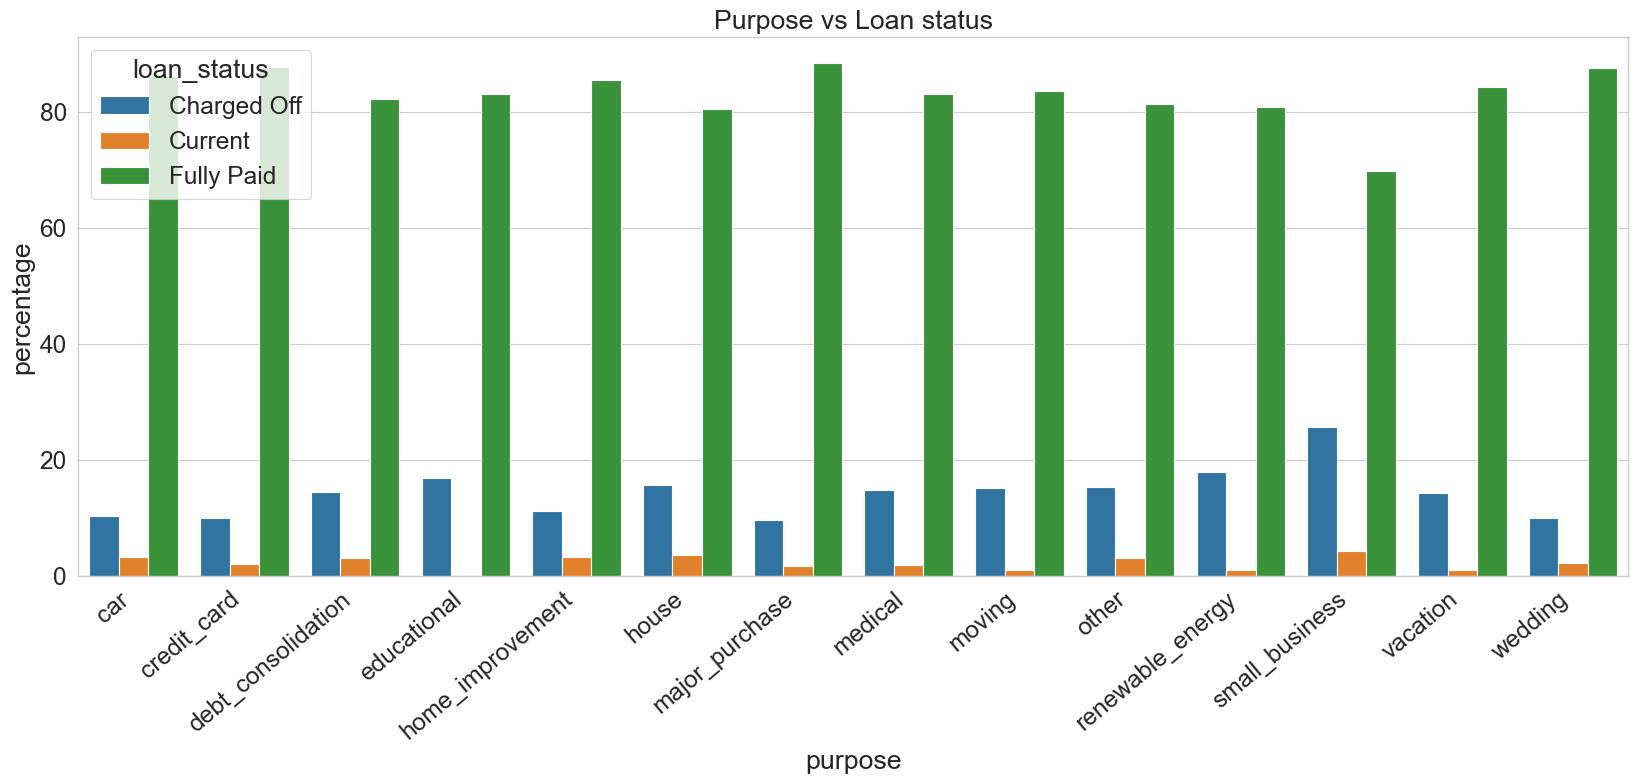

In [153]:
plt.figure(figsize=(20,7))
sns.set_context("paper", font_scale=2)
ax = sns.barplot(x="purpose", y="percentage", hue="loan_status",data=purpose_percentage_loan_status)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Purpose vs Loan status')
plt.show()

### Percentage of charged off records is highest for the purpose of  'small business'  and the least for 'major purchase'. This can be a deciding factor when sanctioning the loans.

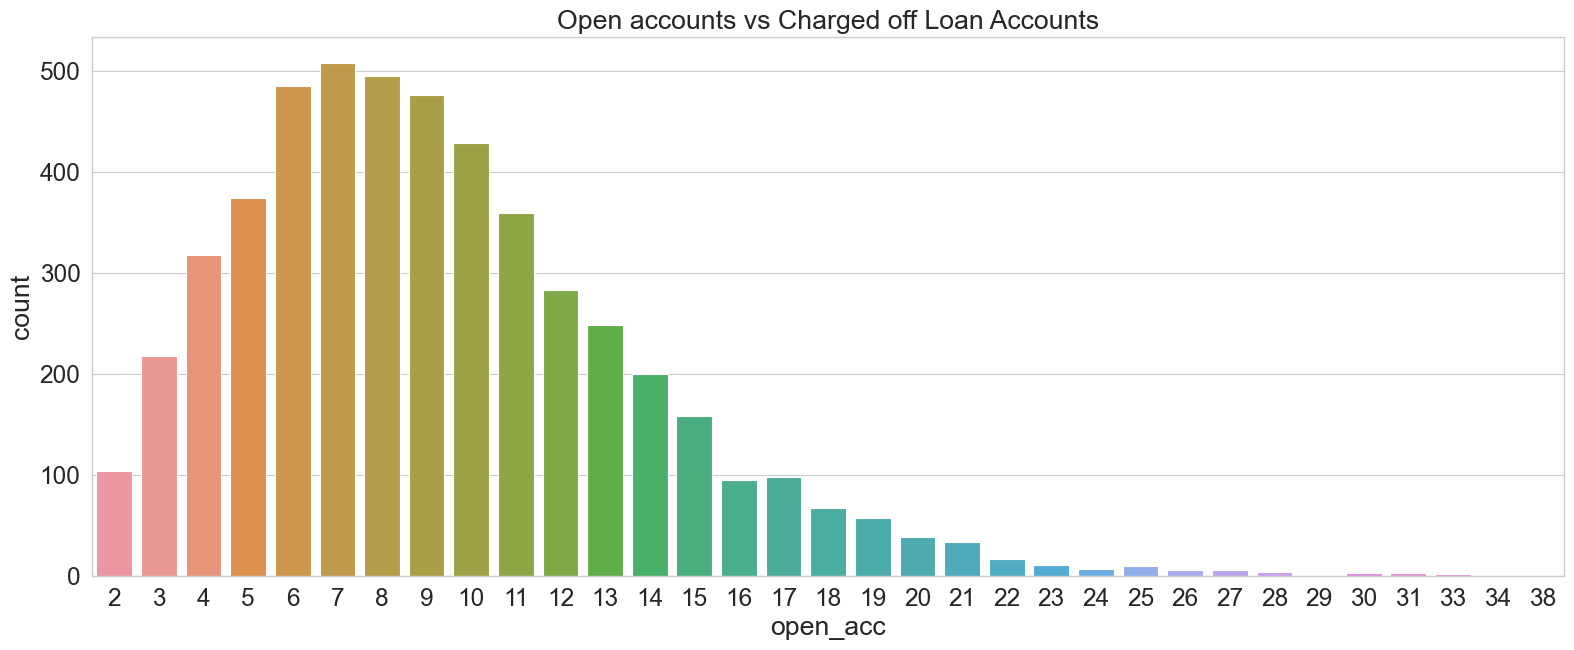

In [154]:
#Plot of open_acc vs Loan Status
plt.figure(figsize=(19,7))
ax = sns.countplot(x="open_acc", data=charged_off_loans)
plt.title('Open accounts vs Charged off Loan Accounts')
plt.show()

### As seen in the above plot, we have the open_accounts vs the count of charged off loans and it seems that the count of charged off loans is higher for those who are having 6-10 open_accounts. 
### Let's see the same by plotting the percentage graph corresponding to open accounts



In [155]:
# Creating the new dataframe containing open_acc w.r.t loan_status for every type of open_acc
open_acc_percentage_loan_status = getDerivedPercentageOnColumnBasedOnLoanStatus('open_acc')

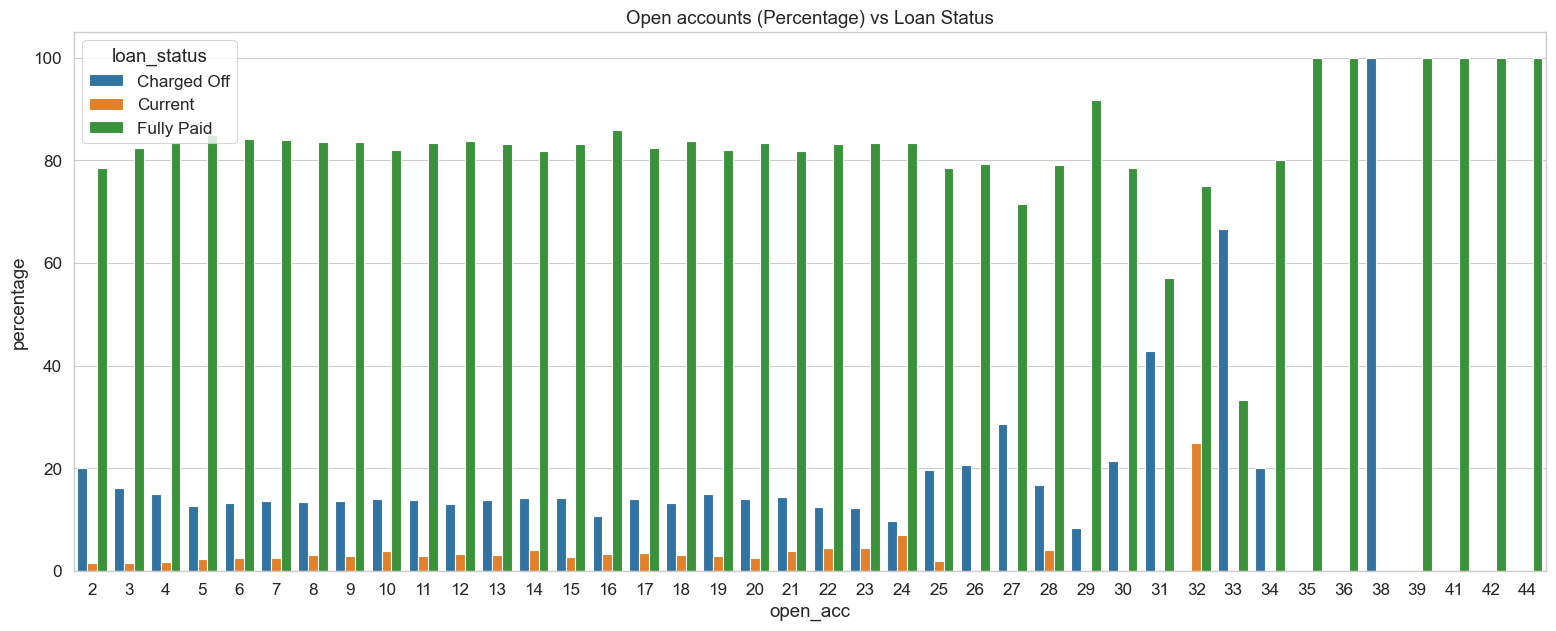

In [156]:
# Plot of open_acc vs loan_status
plt.figure(figsize=(19,7))
sns.set_context("paper", font_scale=1.4)
ax = sns.barplot(x="open_acc", y="percentage", hue="loan_status",data=open_acc_percentage_loan_status)
plt.title('Open accounts (Percentage) vs Loan Status')
plt.show()

### By plotting the percentage of open_acc as above, we do not see a trend of increase/decrease in the number of charged off loans
### Because, we see a trend of increasing as we move from 22 to 27 open_acc but suddenly it decreases.
### Moreover, we do not have any charged_off loan count for 36, 39, 41, 42, etc. open_acc
### So, we can't conclude anything from open_acc

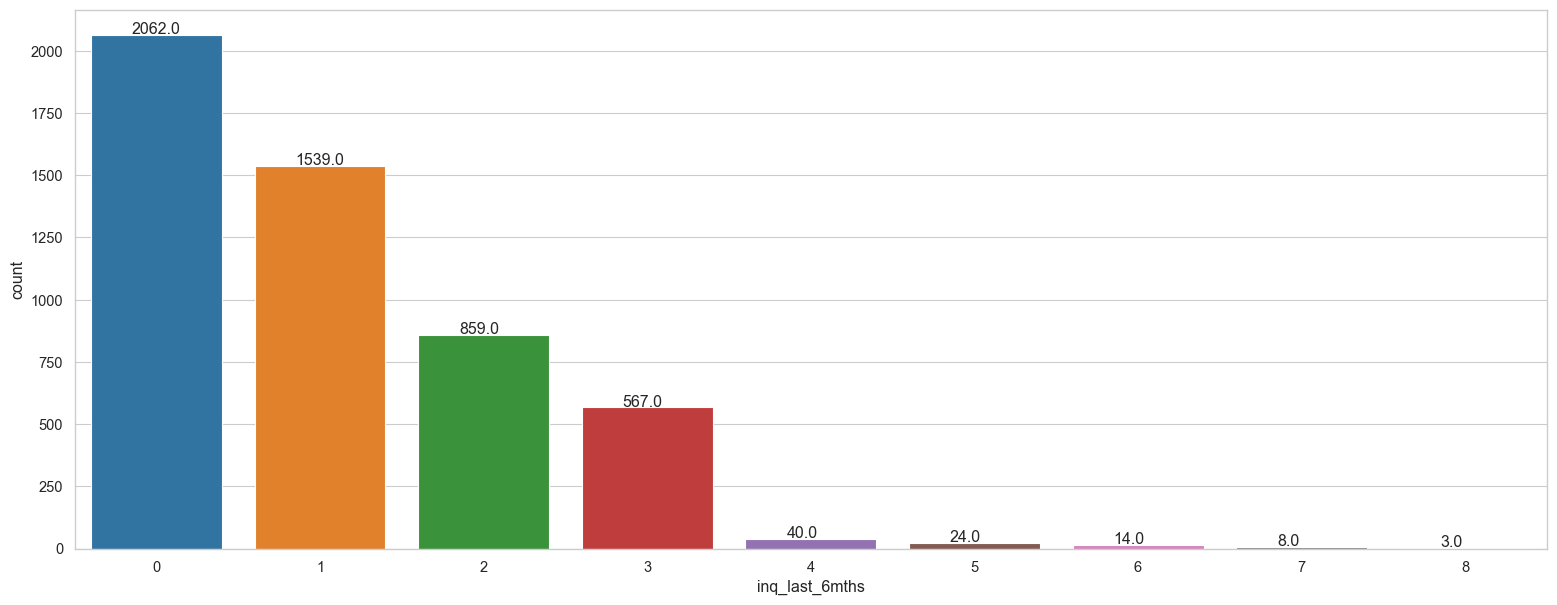

In [157]:
#Plot of inq_last_6_mnths vs loan_status
plt.figure(figsize=(19,7))
sns.set_context("paper", font_scale=1.2)
ax = sns.countplot(x="inq_last_6mths", data=charged_off_loans)
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+5))

### As seen from the above plot, the count of charged off loans tend to decrease with increase in the  count of inq_last_6mnths

In [158]:
# Creating the new dataframe containing inq_last_6mths w.r.t loan_status for every type of inq_last_6mths
open_acc_percentage_loan_status = getDerivedPercentageOnColumnBasedOnLoanStatus('inq_last_6mths')

Text(0.5, 1.0, 'inq_last_6mths vs loan status')

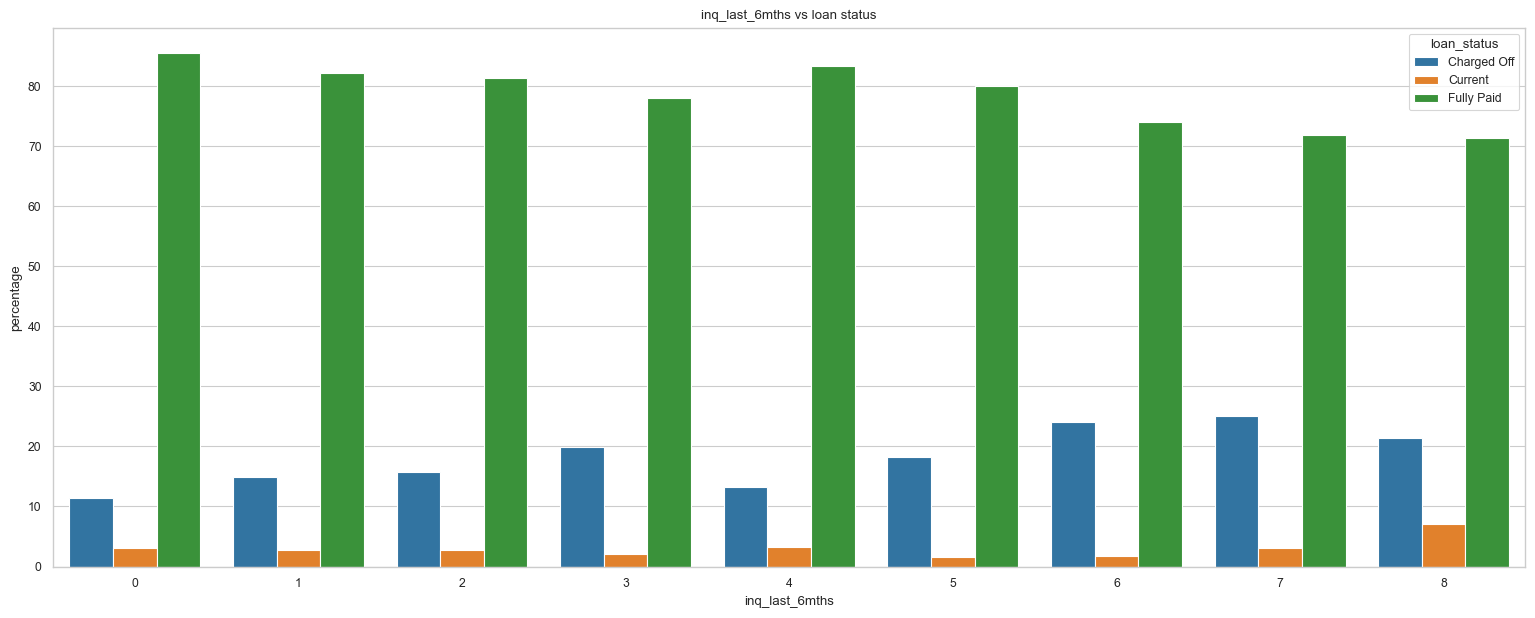

In [159]:
# Plot of inq_last_6mths vs loan_status
plt.figure(figsize=(19,7))
sns.set_context("paper", font_scale=1.0)
ax = sns.barplot(x="inq_last_6mths", y="percentage", hue="loan_status",data=open_acc_percentage_loan_status)
plt.title('inq_last_6mths vs loan status')

### Any specific trend is not shown by this column.

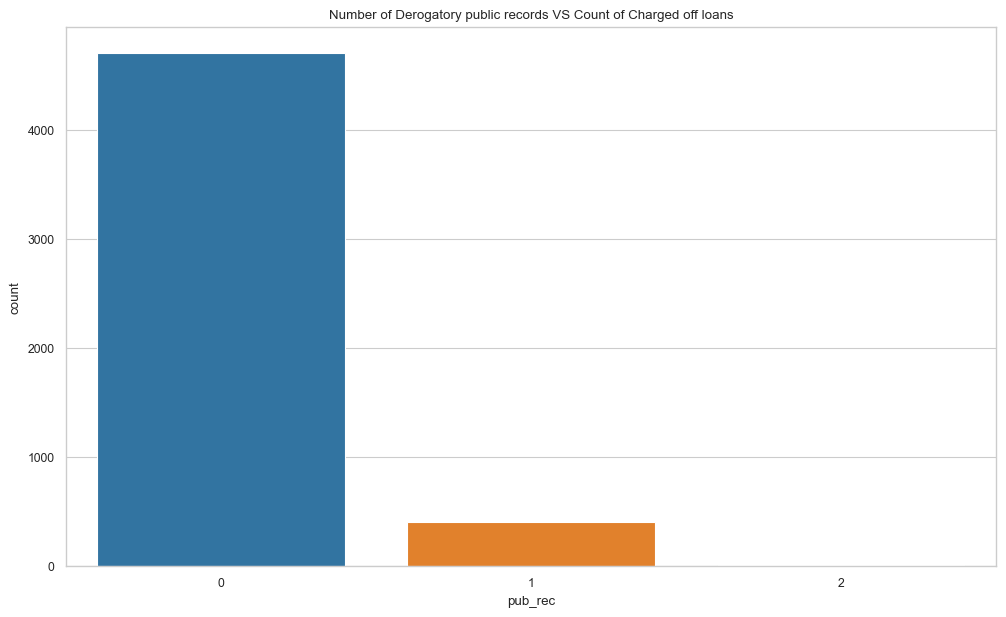

In [160]:
# Plot of Number of derogatory public records vs count of Charged off loans
plt.figure(figsize=(12,7))
ax = sns.countplot(x="pub_rec", data = charged_off_loans)
plt.title('Number of Derogatory public records VS Count of Charged off loans')
plt.show()

### The borrowers with 0 Derogatory records tend to be defaulter as per the above graph but doensn't seem practical

In [161]:
# Creating the new dataframe containing pub_rec w.r.t loan_status for every type of pub_rec
pub_rec_percentage_loan_status = getDerivedPercentageOnColumnBasedOnLoanStatus('pub_rec')

Text(0.5, 1.0, 'Number of derogatory public records vs loan_status')

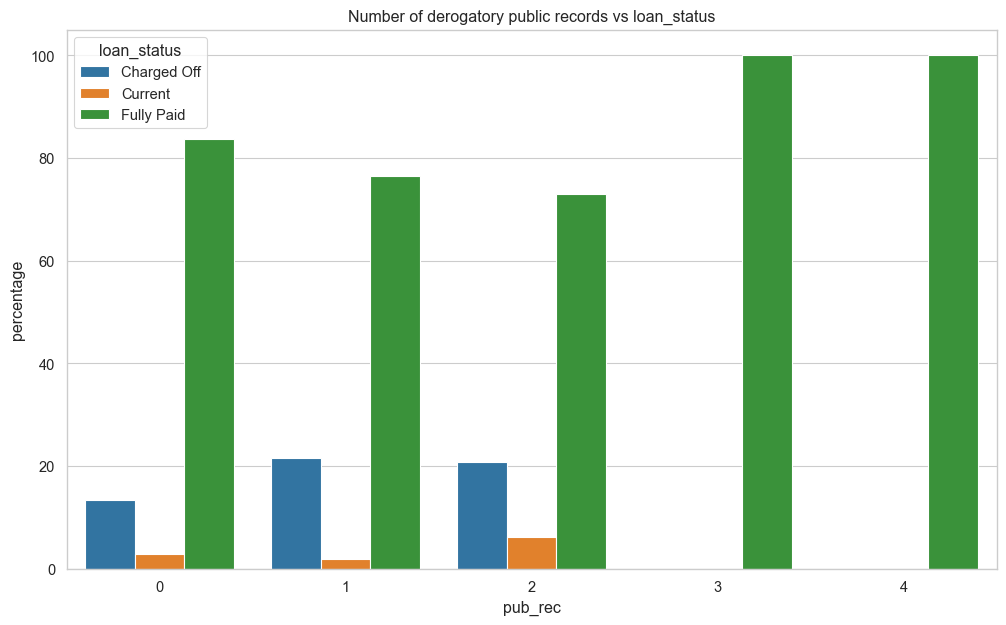

In [162]:
#Plot of pub_rec (percentage) vs loan_status
plt.figure(figsize=(12,7))
sns.set_context("paper", font_scale=1.2)
ax = sns.barplot(x="pub_rec", y="percentage", hue="loan_status",data=pub_rec_percentage_loan_status)
plt.title('Number of derogatory public records vs loan_status')

### As a specific trend is not shown by the above plot. Thus, we cannot use pub_rec to derive conclusion whether the borrower should be sanctioned loan or not

In [163]:
# Creating the new dataframe containing addr_state w.r.t loan_status for every type of addr_state
addr_state_percentage_loan_status = getDerivedPercentageOnColumnBasedOnLoanStatus('addr_state')

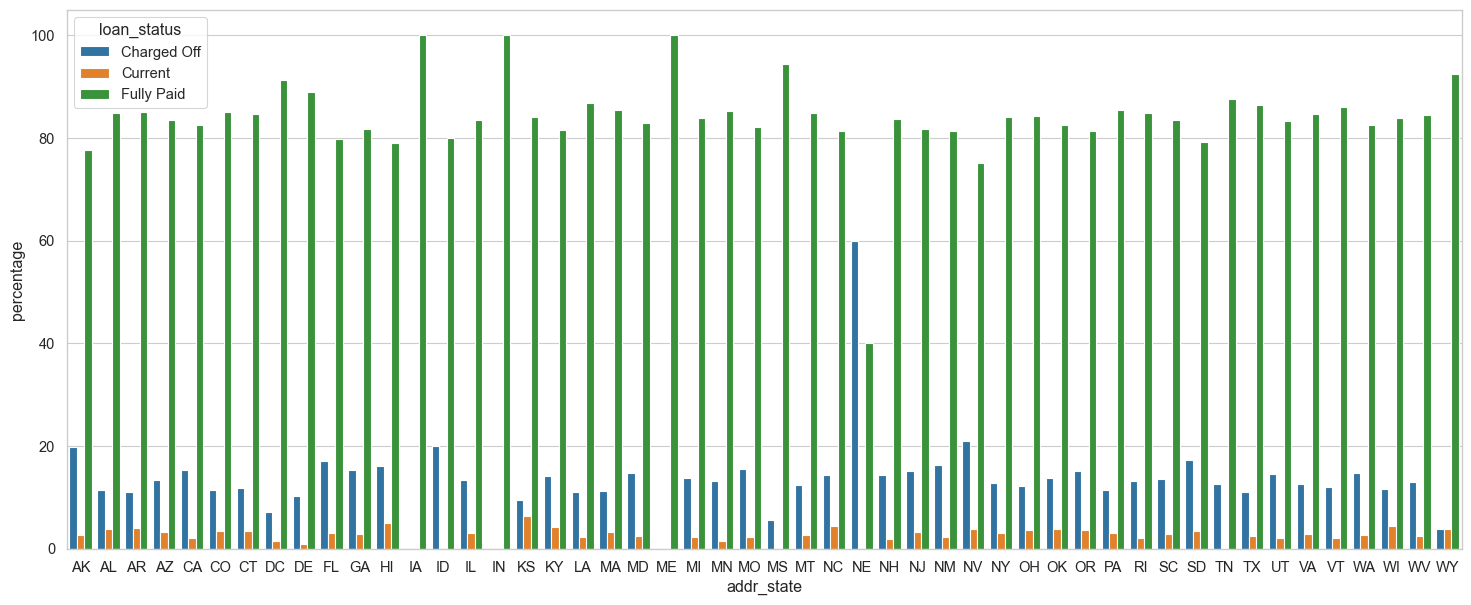

In [164]:
# Plot of percentage calculation on addr_state by groupby on loan_status
plt.figure(figsize=(18,7))
ax = sns.barplot(x = "addr_state", y = "percentage", hue = "loan_status",data = addr_state_percentage_loan_status)

### From one of the above graphs (univariate for addr_state) it is clear that more applicants are from CA (California) state hence charged off records are more from that state. 
### However when derived the percentage column based upon the loan_status from each state, NE (Nebraska) showed most charged off records. Hence it can be considered as risky state for loan applications.

In [165]:
# Creating the new dataframe containing grade w.r.t loan_status for every type of grade
grade_percentage_loan_status = getDerivedPercentageOnColumnBasedOnLoanStatus('grade')

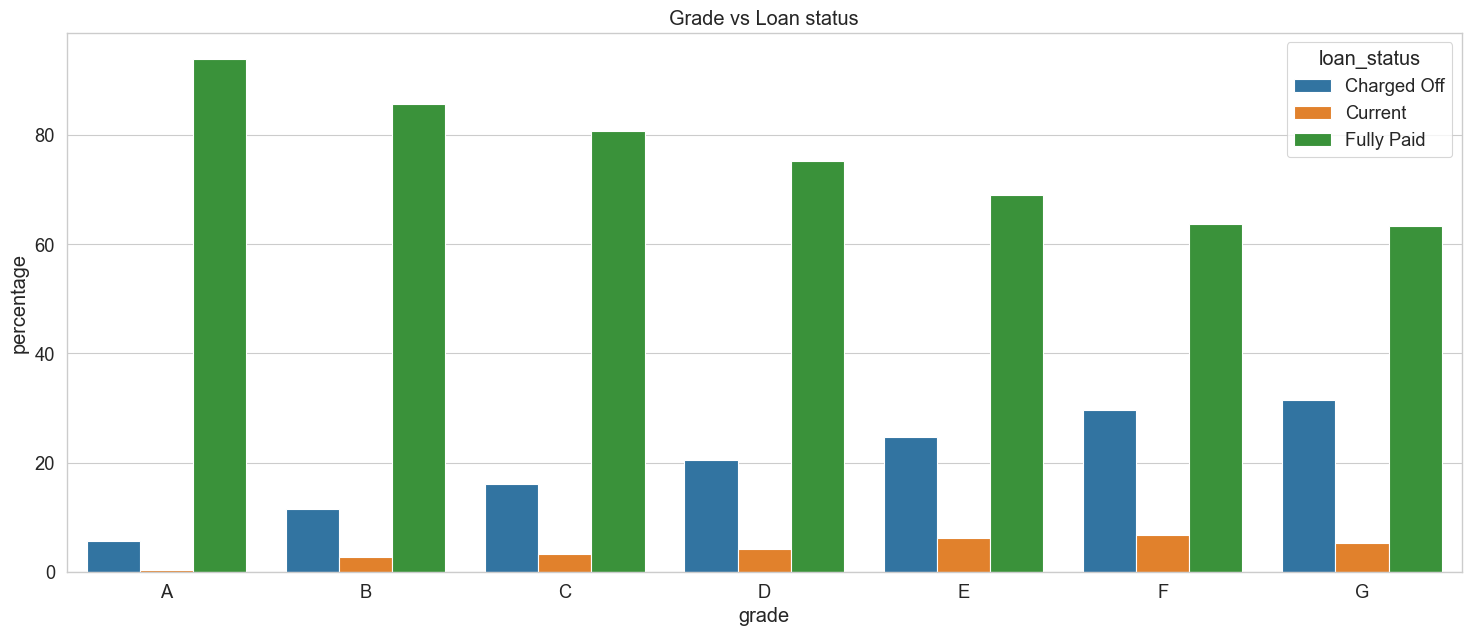

In [166]:
# Plot of loan status vs Grade
plt.figure(figsize=(18,7))
sns.set_context("paper", font_scale=1.5)
ax = sns.barplot(x="grade", y="percentage", hue="loan_status",data=grade_percentage_loan_status)
plt.title('Grade vs Loan status')
plt.show()

### As seen in the above plot, we see an incremental trend i.e. the percentage of charged off loans is increasing while going from A to G. Thus, we can rely on this attribute. The defaulting risk is highest for grade G and the lowest for A.

In [188]:
def plot_bar_graph(dataframe, x_column, y_column=None, hue_column=None, title=None, xlabel=None, ylabel=None, figsize=(10, 6), x_tick_rotation=90, freq_rotation=0, filter_column=None, filter_value=None):
    
    # Apply the filter if filter_column and filter_value are provided
    if filter_column and filter_value is not None:
        filtered_dataframe = dataframe[dataframe[filter_column] == filter_value]
    else:
        filtered_dataframe = dataframe

    # Set the style
    sns.set(style="whitegrid")

    # Create the bar plot
    plt.figure(figsize=figsize)
    
    if y_column:
        y_data = filtered_dataframe[y_column].value_counts()
        x_data = y_data.index
        sns.barplot(x=x_data, y=y_data.values, hue=hue_column)
    else:
        sns.barplot(data=filtered_dataframe, x=x_column, hue=hue_column)

    # Display frequency on top of the bars with rotation
    if y_column:
        for p in plt.gca().patches:
            plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', rotation=freq_rotation)

    # Set title and labels
    if title:
        plt.title(title, fontsize=14)
    if xlabel:
        plt.xlabel(xlabel, fontsize=12)
    if ylabel:
        plt.ylabel(ylabel, fontsize=12)

    # Rotate x-axis labels
    plt.xticks(rotation=x_tick_rotation)

    # Show the plot
    plt.show()

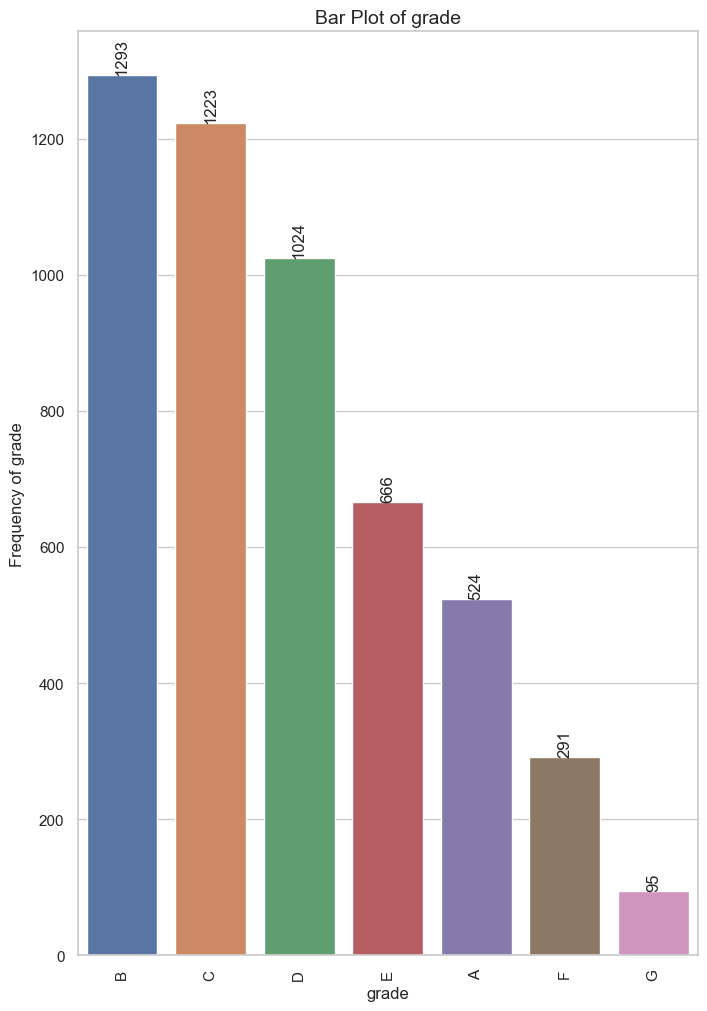

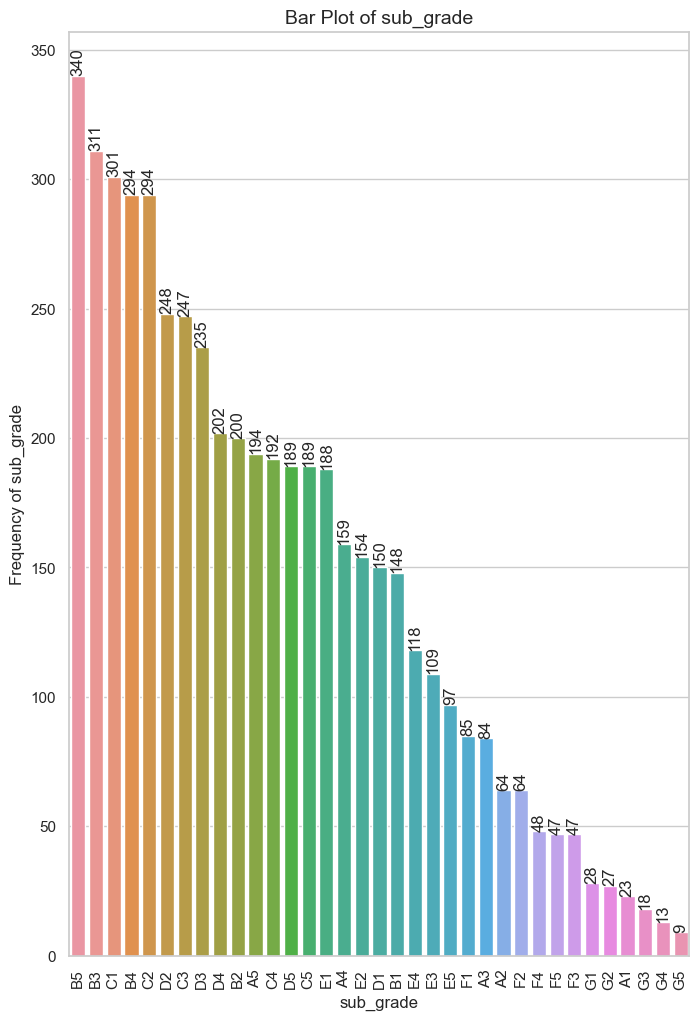

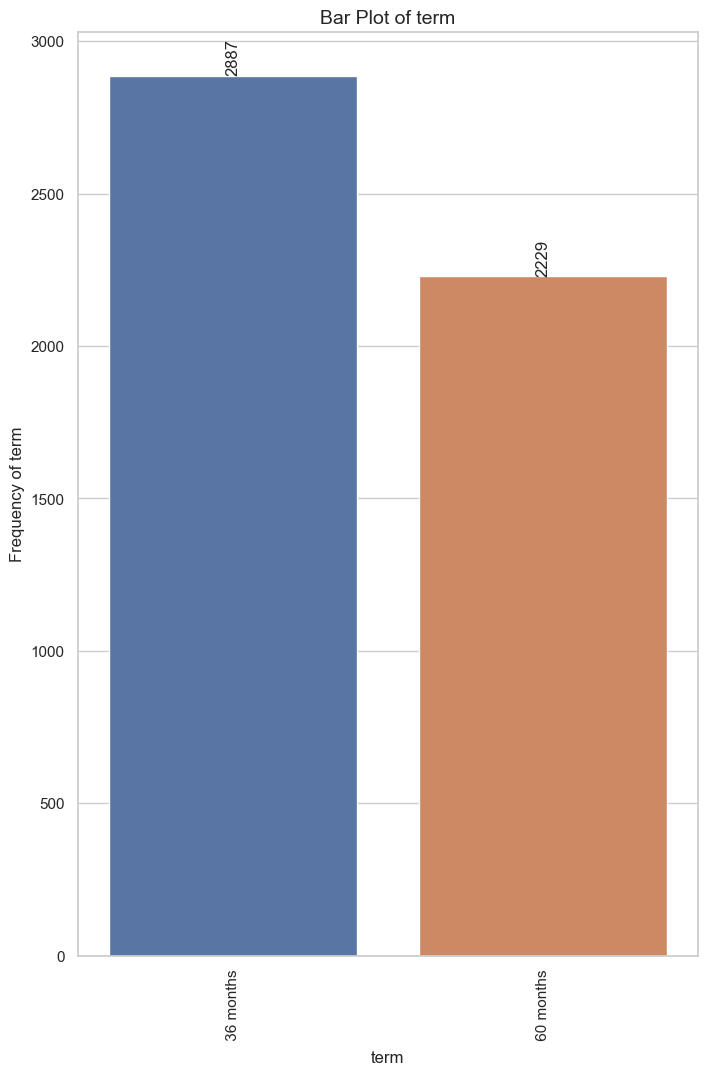

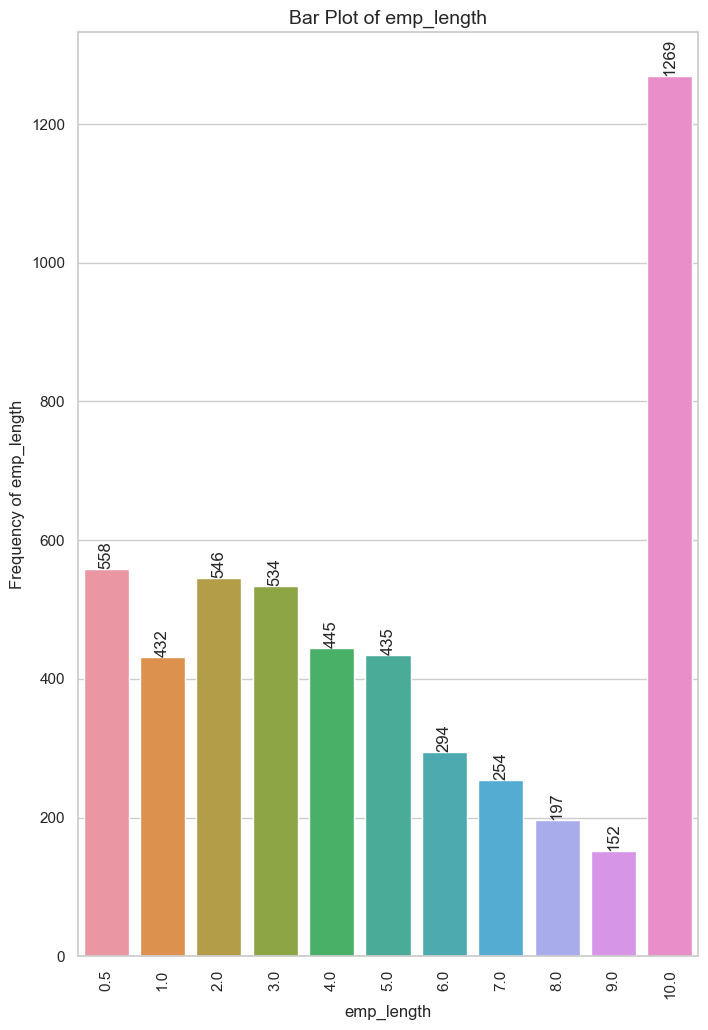

KeyError: 'issue_y'

<Figure size 800x1200 with 0 Axes>

In [189]:
for cat_var in ['grade', 'sub_grade', 'term', 'emp_length', 'issue_y', 'issue_m', 'issue_q']:
    plot_bar_graph(
        loan_data,
        x_column = cat_var,
        y_column = cat_var,
        title = f'Bar Plot of {cat_var}',
        xlabel = cat_var,
        ylabel=f'Frequency of {cat_var}',
        figsize=(8, 12),
        x_tick_rotation=90,
        freq_rotation=90,
        filter_column='loan_status',
        filter_value='Charged Off'
    )

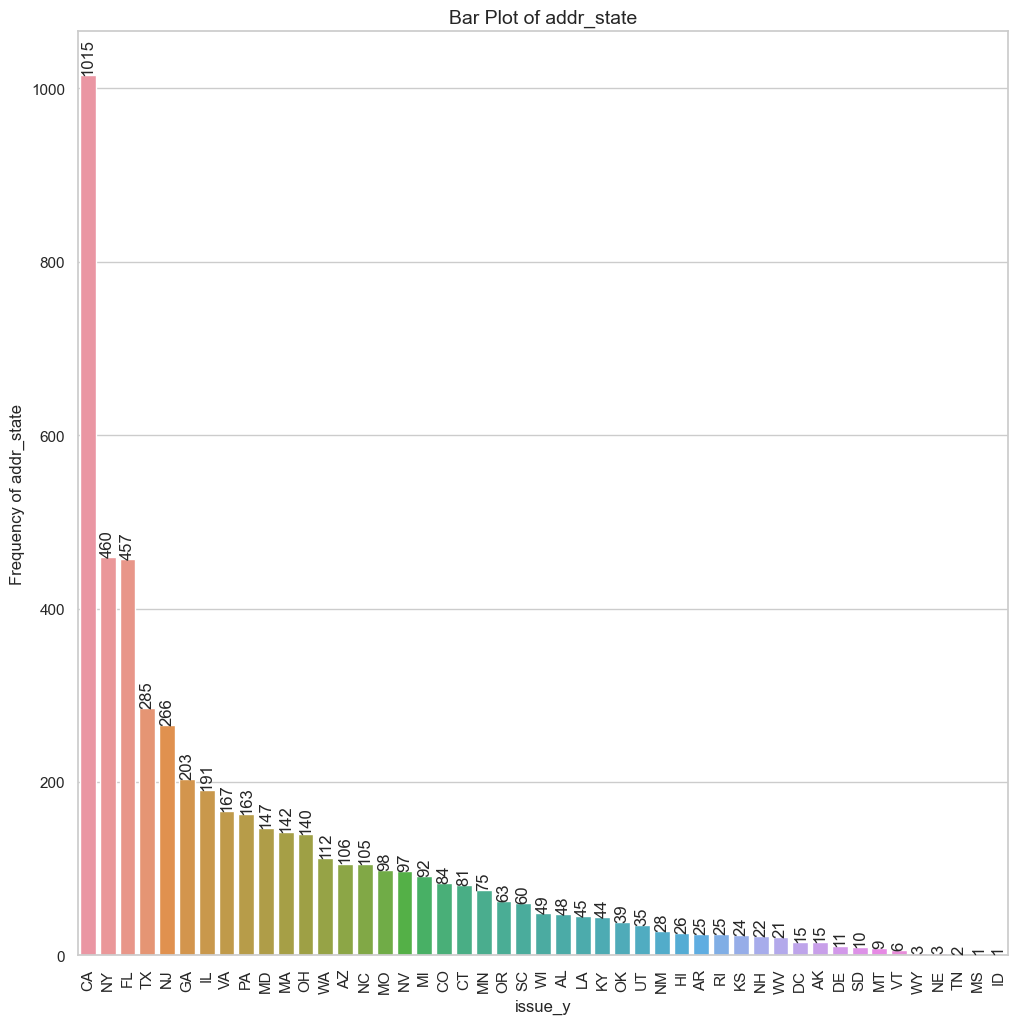

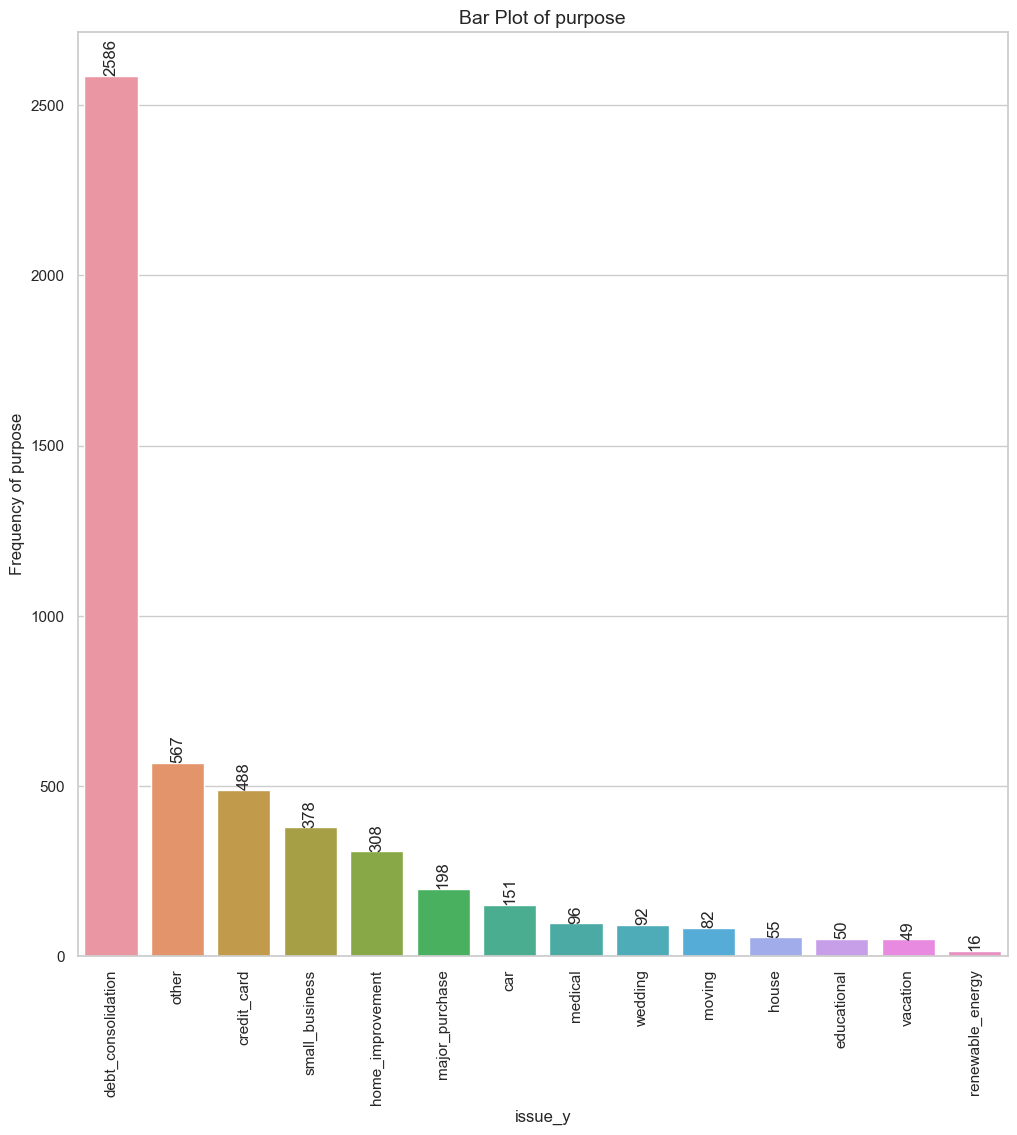

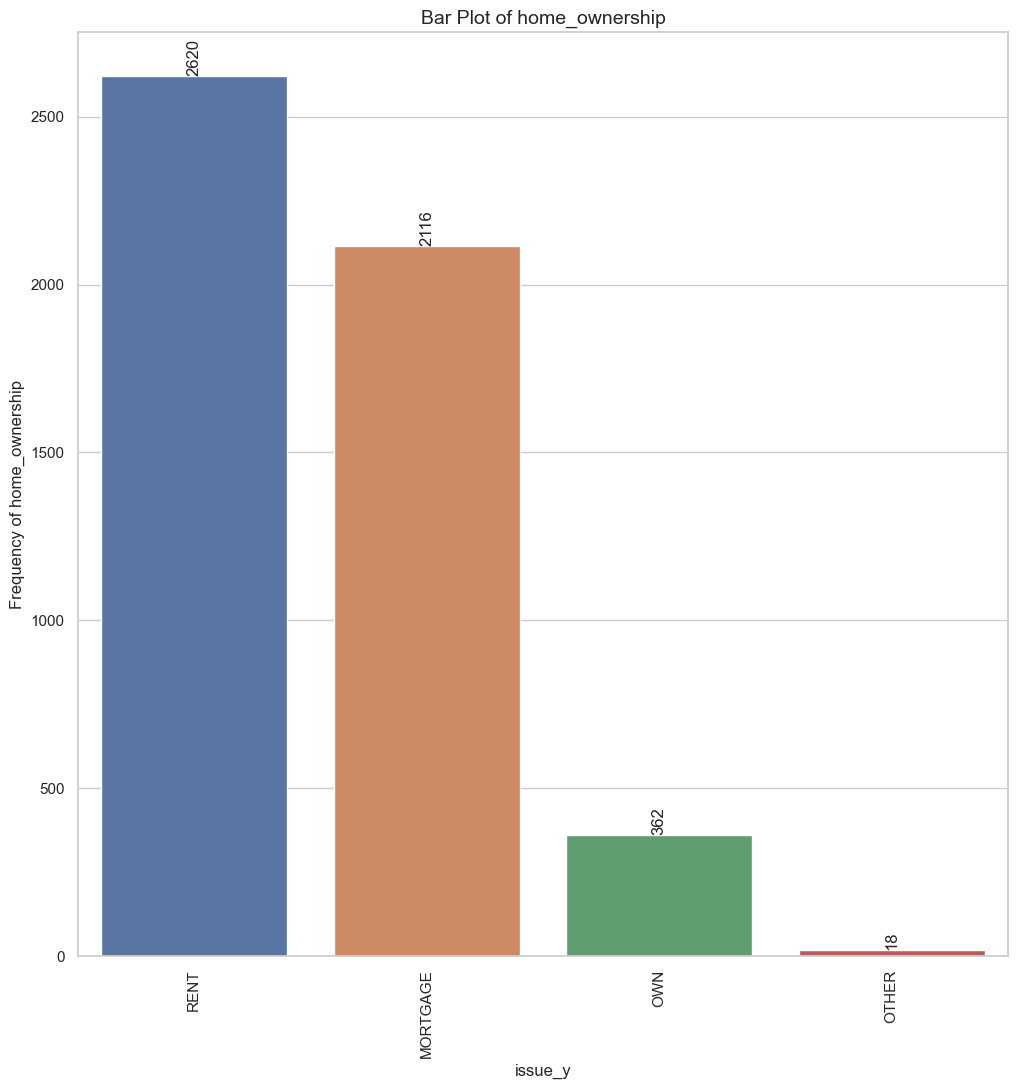

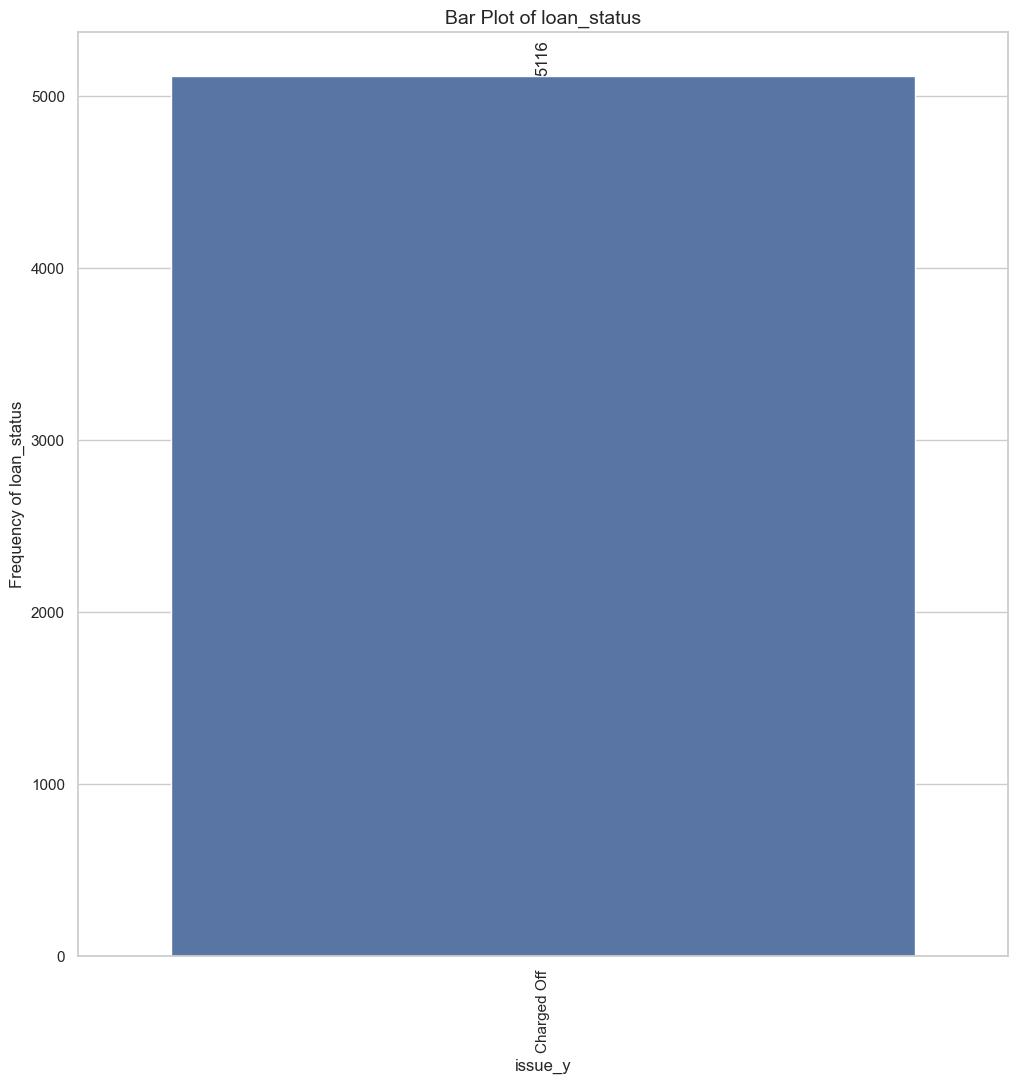

In [192]:
for un_cat_var in ['addr_state', 'purpose', 'home_ownership', 'loan_status']:
    plot_bar_graph(
        loan_data,
        x_column = un_cat_var,
        y_column = un_cat_var,
        title = f'Bar Plot of {un_cat_var}',
        xlabel = cat_var,
        ylabel=f'Frequency of {un_cat_var}',
        figsize=(12, 12),
        x_tick_rotation=90,
        freq_rotation=90,
        filter_column='loan_status',
        filter_value='Charged Off'
    )